<center>


# ARHITEKTURA NEURONSKIH MREŽA
## 2023./2024.
## Projekt - Analiza hiperparametara
#### Marko Bonovil
#### 1. dio
</center>


Svrha projekta je kreiranje najboljeg mogućeg modela neuronske mreže za određivanje odlijeva klijenata iz telekomunikacijske kompanije na osnovu korištenih hiperparametara. Pomoću algoritama za pretragu odrađena je analiza mogućih kombinacija te na koncu je odrađena usporedba između korištenih algoritama za pretragu.

#Sadržaj

1. Biblioteke
2. Eksplorativna analiza podataka
3. Enkodiranje i uklanjanje stupca
4. Normalizacija podataka
5. Podjela skupa podataka
6. Sempliranje podataka
7. Analiza hiperparametara
8. Hyperband algoritam
9. Random Search algoritam
10. Usporedba rezultata

# Biblioteke

In [ ]:
import math
import time
import pickle
import numpy as np
import pandas as pd
from math import exp
import seaborn as sns
import tensorflow as tf
from keras import losses
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from keras.models import Sequential, Model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
from tensorflow.keras import initializers, optimizers
from imblearn.under_sampling import RandomUnderSampler
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Input, Flatten, Dense, concatenate
from tensorflow.keras.optimizers import Adagrad, Adam, RMSprop, SGD
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Učitavanje skupa podataka

Prvi korak je povezati se s Google Driveom kako bi mogli učitati podatke u Google Colaboratory.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Arhitekture neuronskih mreža/Projekt

/content/drive/MyDrive/Arhitekture neuronskih mreža/Projekt


Učitavanje skupa podataka u data frame.

In [ ]:
dataset = pd.read_csv("telco_dataset.csv")

#Eksplorativna analiza podataka

##Opis skupa podataka

### Atributi i njihovi opisi:
*  customerID - ID klijenta
*  gender - spol klijenta
*	 SeniorCitizen - je li klijent punoljetna osoba
*	 Partner - ima li klijent partnera ili ne
*	 Dependents - uzdržava li klijent druge osobe ili ne
*	 tenure - broj mjeseci koje je klijent proveo u kompaniji
*	 PhoneService - ima li klijent mobilne usluge
*	 MultipleLines - koliko klijent ima mobilnih linija
*	 InternetService - ima li klijent internetske usluge
*	 OnlineSecurity - ima li klijent internetsku sigurnost kao uslugu
*	 OnlineBackup - ima li klijent online pohranu podataka kao uslugu
*	 DeviceProtection - ima li klijent zaštitu uređaja kao uslugu
*	 TechSupport - ima li klijent tehničku podršku kao uslugu
*	 StreamingTV - ima li klijent Streeaming usluge
*	 StreamingMovies - podržavaju li klijentove usluge streaming filmova
*	 Contract - Koji tip ugovora je klijent potpisao sa telekom operaterom
*	 PaperlessBilling - prima li klijent račun poštom ili online
*	 PaymentMethod - način plaćanja računa
*	 MonthlyCharges - mjesečni troškovi klijenta
*	 TotalCharges - ukupni troškovi klijenta
*	 Churn - Je li klijent napustio telekom operatera ili ne



In [ ]:
print(f"Skup podataka sadrži : {dataset.shape[0]} zapisa i {dataset.shape[1]} atributa za svaki zapis")
print(f"Broj elemenata je: {dataset.size}")
print(f"Broj dimenzija: {dataset.ndim}")

Skup podataka sadrži : 7043 zapisa i 21 atributa za svaki zapis
Broj elemenata je: 147903
Broj dimenzija: 2


In [ ]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Iz pregleda atributa i njihovih tipova podataka možemo vidjeti da se skup sastoji od 18 kategoričkih atributa i 3 numerička atributa.

In [ ]:
for column in dataset.columns:
  print('Atribut "{}" - Jedinstvene vrijednosti {}'.format(column, dataset[column].unique()))

Atribut "customerID" - Jedinstvene vrijednosti ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Atribut "gender" - Jedinstvene vrijednosti ['Female' 'Male']
Atribut "SeniorCitizen" - Jedinstvene vrijednosti [0 1]
Atribut "Partner" - Jedinstvene vrijednosti ['Yes' 'No']
Atribut "Dependents" - Jedinstvene vrijednosti ['No' 'Yes']
Atribut "tenure" - Jedinstvene vrijednosti [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Atribut "PhoneService" - Jedinstvene vrijednosti ['No' 'Yes']
Atribut "MultipleLines" - Jedinstvene vrijednosti ['No phone service' 'No' 'Yes']
Atribut "InternetService" - Jedinstvene vrijednosti ['DSL' 'Fiber optic' 'No']
Atribut "OnlineSecurity" - Jedinstvene vrijednosti ['No' 'Yes' 'No internet service']
Atribut "OnlineBackup" - Jedinstvene vrijednosti ['Yes' 'N

Pregledom jedinstvenih vrijednosti za svaki atribut skupa može se zaključiti da je potrebno promjeniti tip podatka za atribut "TotalCharges" jer prikazuje numeričke podatke odnosno podatke tipa float, a pohranjen je kao object odnosno kategorički atribut. Što se tiče ostalih atributa odabran je prikladan tip podatka.

Za pretvorbu atributa korištena je pandas funkcija to_numeric() sa parametrom 'errors = "coerce" ' koja vrijednosti atributa koji se nemogu pretvoriti u numeričke podatke sprema kao NaN vrijednost.

In [ ]:
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors = 'coerce')
print("Atributu TotalCharges promjenjen je tip podatka!")

Atributu TotalCharges promjenjen je tip podatka!


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Pretvorbom atributa 'TotalCharges' trenutno u skupu podataka ima 4 numerička atributa te 17 kategoričkih atributa.

In [ ]:
dataset.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
dataset.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No  
1               No      Mailed check           56.95       1889.50    No  
2              Yes      Mailed check           53.85        108.15   Yes

Nakon upoznavanja sa skupom podataka i utvrđivanja prvih pogrešaka sljedeći korak je pretraga skupa na osnovu nedostajućih vrijednosti.

###Nedostajuće vrijednosti

In [ ]:
print(dataset.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Jedine pronađene nedostajuće vrijednosti u skupu podataka nalaze se kod atributa TotalCharges koje su vjerojatno uzrokovane pretvorbom atributa iz kategoričkog u numerički, a ukupno ih je 11 u cijelom skupu. Slijedi pregled zapisa koji sadrže NaN vrijednosti kako bi se procjenio daljnji postupak rada sa nepoznatim vrijednostima.

In [ ]:
nan_values = dataset[dataset["TotalCharges"].isna()].index
print("Indeksi zapisa koji sadrže nedostajuće vrijednosti : ")
for element in nan_values:
  print(element)

Indeksi zapisa koji sadrže nedostajuće vrijednosti : 
488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


In [ ]:
display(dataset.iloc[nan_values])

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85       

Iz pregleda zapisa koji sadrže NaN vrijednosti može se uočiti da je kod svih njih zajedničko to da im je broj mjeseci koji su proveli u kompaniji, odnosno podaci za atribut 'Tenure' jednak 0. Svi prikazani zapisi imaju podatke za 'MonthlyCharges stoga najprikladnijje bi bilo da se nedostajuće vrijednosti za atribut 'TotalCharges' zamjene sa vrijednostima iz atributa 'MonthlyCharges'.

In [ ]:
dataset.loc[nan_values, 'TotalCharges'] = dataset.loc[nan_values, 'MonthlyCharges']

In [ ]:
display(dataset.iloc[nan_values])

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55         52.55    No  
753                Mailed check           20.25         20.25    No  
936                Mailed check           80.85         80.85    No  
1082               Mailed check           25.75         25.75    No  
1340    Credit card (automatic)           56.05         56.05    No  
3331               Mailed check           19.85       

Atribut "PaymentMethod" sadrži varijable koje u sebi imaju "(automatic)" dio stringa koji je nepotreban jer se svi vrste vrijednosti koje se pojavljuju u tom atributu međusobno razlikuju i bez toga. Stoga možemo ukloniti dio "(automatic)" iz "paymentMethod" atributa.

In [ ]:
dataset["PaymentMethod"] = dataset["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

###Deskriptivna statistika

Deskriptivna statistika za kategoričke atribute

In [ ]:
dataset.describe(include="object").T

count unique               top  freq
customerID        7043   7043        3186-AJIEK     1
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
Churn             7043      2                No  5174

Deskriptivna statistika za numeričke atribute

In [ ]:
dataset[["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]].describe().T

count         mean          std    min     25%      50%  \
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.00     0.00   
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.00   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.35   
TotalCharges    7043.0  2279.798992  2266.730170  18.80  398.55  1394.55   

                    75%      max  
SeniorCitizen      0.00     1.00  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80

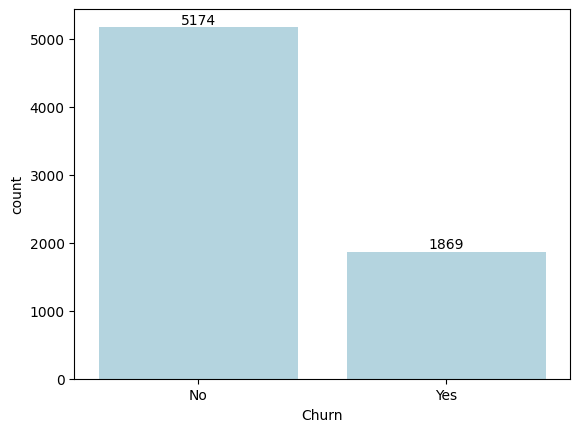

In [ ]:
graf=sns.countplot(x=dataset["Churn"], color="lightblue")
graf.bar_label(graf.containers[0])
plt.xlabel="Churn"
plt.ylabel="Count"

In [ ]:
def categorical_to_churn(df,categorical, target):
    columns = 2
    rows = math.ceil(len(categorical)/2)

    fig = plt.figure(figsize = (12, 5*rows))

    for index, column in enumerate(categorical, 1):
        ax = fig.add_subplot(rows,columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, legend=True)
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
        ax.set_title(column)
    return plt.show()

In [ ]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

Usluge klijenata u odnosu na to je li klijent ostao kod telekom operatera ili ne.


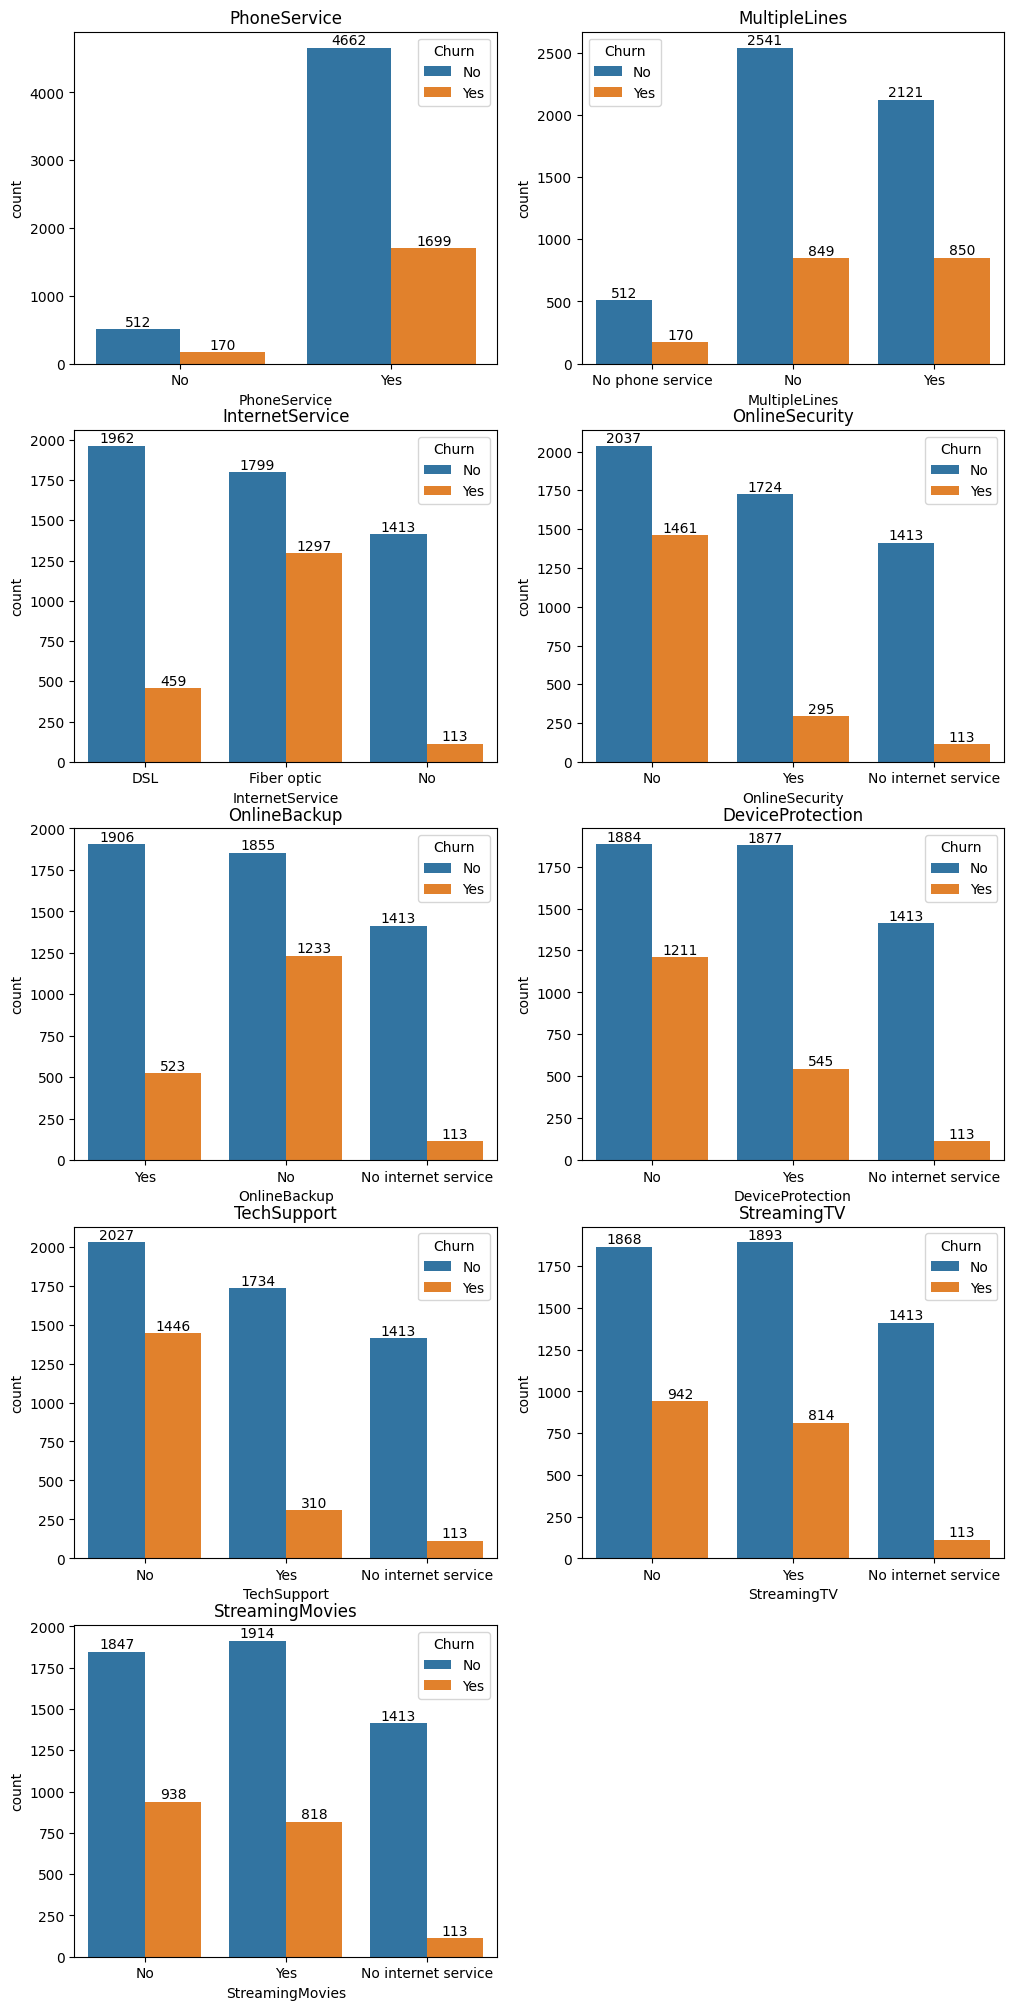

In [ ]:
print("Usluge klijenata u odnosu na to je li klijent ostao kod telekom operatera ili ne.")
categorical_to_churn(dataset,customer_services, "Churn")

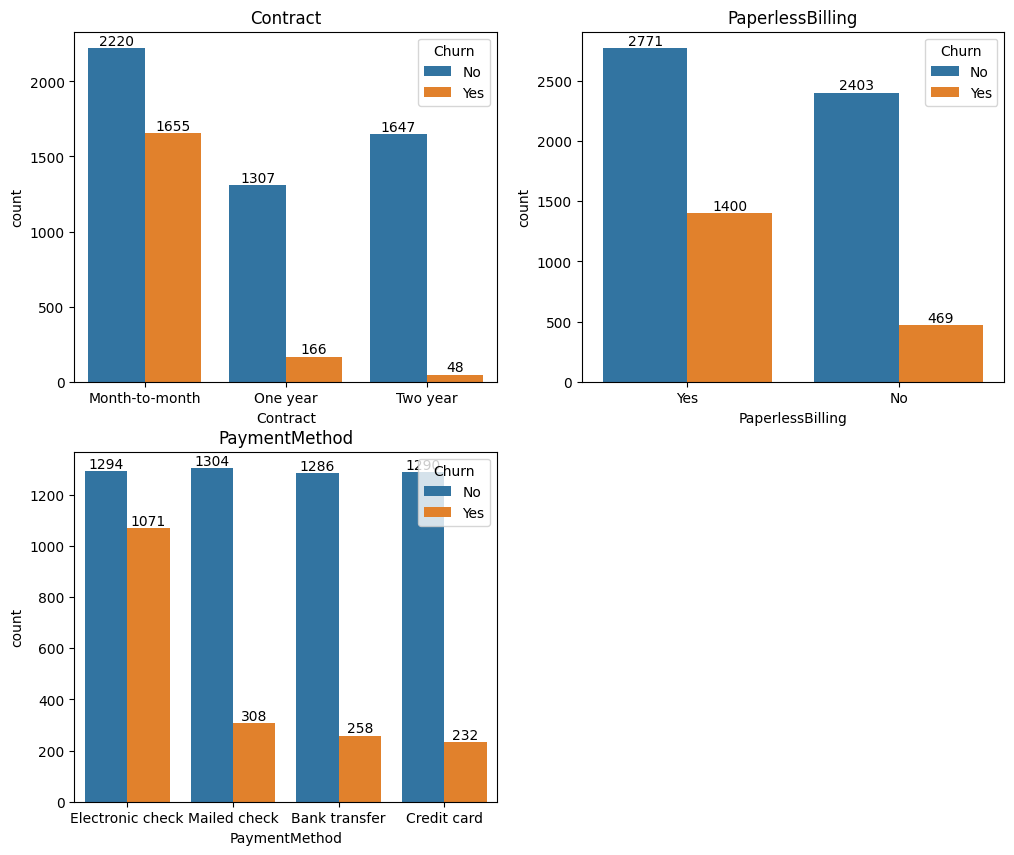

In [ ]:
customer_account = ["Contract","PaperlessBilling","PaymentMethod"]
categorical_to_churn(dataset,customer_account,"Churn")

In [ ]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize=(12,5*number_of_rows))

    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(dataset[column][dataset[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(dataset[column][dataset[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    return plt.show()

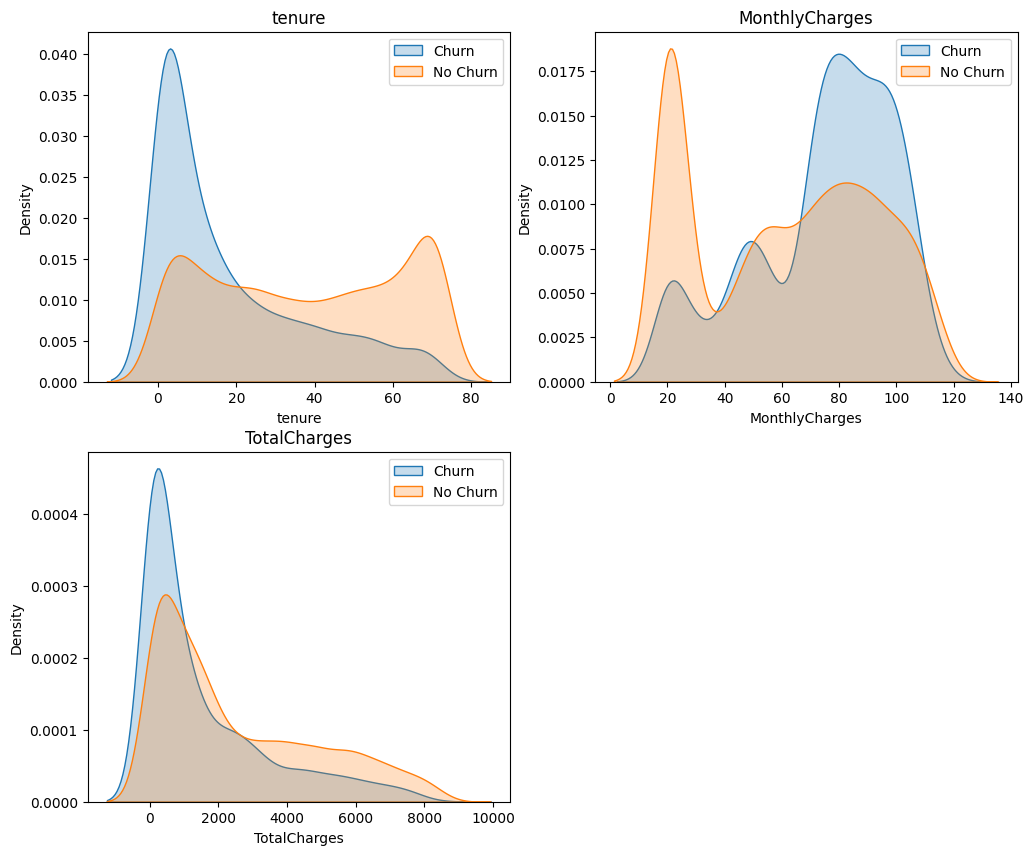

In [ ]:
customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(dataset,customer_account_num, "Churn")

In [ ]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = dataset, color="lightblue")
        ax.set_title(column)
    return plt.show()

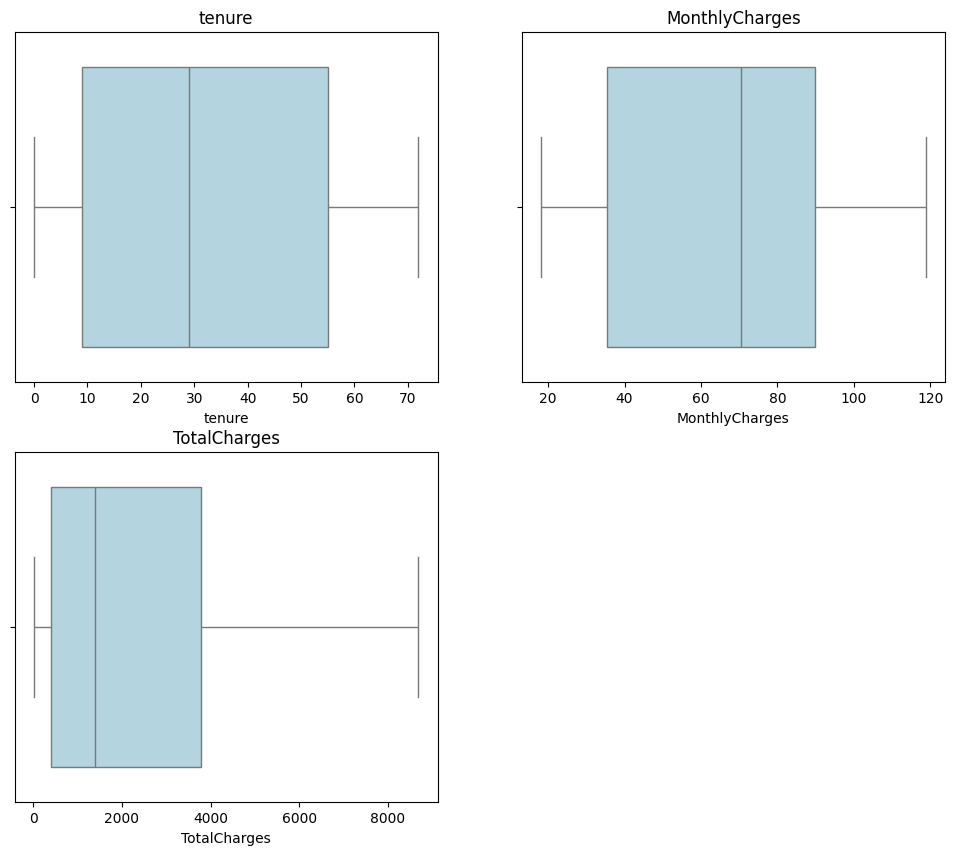

In [ ]:
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(dataset,numerical_values)

#Enkodiranje i uklanjanje stupca

Iz skupa podataka uklanjamo atribut "CustomerID" zbog toga što je nepotreban za daljnu analizu kao i za postizanje cilja projekta.

In [ ]:
dataset.drop(columns=["customerID"], inplace=True)

Sa label encoding pretvorene su atributi koji imaju samo vrijednosti ['Yes' i 'No'], a to su:
* Partner
* Dependents
* PhoneService
* Churn
* PaperlessBilling
* Gender

Nakon toga, također primenom label encodinga, pretvoren je atribut Gender koji se sastoji od vrijednosti 'Male' i 'Female'.

In [ ]:
dp = dataset.copy()
le = LabelEncoder()

In [ ]:
YesNoFeatures = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

df = label_encoding(dp,YesNoFeatures)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

In [ ]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1  Electronic check           29.85         29.85      0  
1                 0      Mailed check           56.95       1889.50      0  
2                 1      Mailed check           53.85        108.15      1  
3                 0     Bank transfer           42.30       1840.75      0  
4                 1  Electronic check           70.70        151.65      1

Primjenom One-hot encoding pretvorene su sve ostale kategoričke vrijednosti atributa, a to su:
* MultipleLines
* InternetService
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* StreamingTV
* StreamingMovies
* Contract
* PaymentMethod

In [ ]:
string_features = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
data = pd.get_dummies(df, columns=string_features)

In [ ]:
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  MultipleLines_No  \
0                 1           29.85         29.85      0             False   
1                 0           56.95       1889.50      0              True   
2                 1           53.85        108.15      1              True   
3                 0           42.30       1840.75      0             False   
4                 1           70.70        151.65      1              True   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                            True              False                 True   
1                           False              False                 True   
2                           False              False                 True   
3                            True              False                 True   
4                           False              False                False   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                        False               False               True   
1                        False               False              False   
2                        False               False              False   
3                        False               False              False   
4                         True               False               True   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                               False               False            False   
1                               False                True             True   
2                               False                True            False   
3                               False                True             True   
4                               False               False             True   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                             False              True                 True   
1                             False             False                False   
2                             False              True                 True   
3                             False             False                False   
4                             False             False                 True   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                 False                 False            True   
1                                 False                  True            True   
2                                 False                 False            True   
3                                 False                  True           False   
4                                 False                 False            True   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                            False            False            True   
1                            False            False            True   
2                            False            False            True   
3                            False             True            True   
4                            False            False            True   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                            False            False                True   
1                            False            False                True   
2                            False            False                True   
3                            False            False  

In [ ]:
label=['MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check']

def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({True:1, False:0})
    return df

df2 = label_encoding(data,label)


In [ ]:
df2.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  MultipleLines_No  \
0                 1           29.85         29.85      0                 0   
1                 0           56.95       1889.50      0                 1   
2                 1           53.85        108.15      1                 1   
3                 0           42.30       1840.75      0                 0   
4                 1           70.70        151.65      1                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               1                  0                    1   
1                               0                  0                    1   
2                               0                  0                    1   
3                               1                  0                    1   
4                               0                  0                    0   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                            0                   0                  1   
1                            0                   0                  0   
2                            0                   0                  0   
3                            0                   0                  0   
4                            1                   0                  1   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                   0                   0                0   
1                                   0                   1                1   
2                                   0                   1                0   
3                                   0                   1                1   
4                                   0                   0                1   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                                 0                 1                    1   
1                                 0                 0                    0   
2                                 0                 1                    1   
3                                 0                 0                    0   
4                                 0                 0                    1   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                     0                     0               1   
1                                     0                     1               1   
2                                     0                     0               1   
3                                     0                     1               0   
4                                     0                     0               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                0                0               1   
1                                0                0               1   
2                                0                0               1   
3                                0                1               1   
4                                0                0               1   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                                0                0                   1   
1                                0                0                   1   
2                                0                0                   1   
3                                0                0  

#Normalizacija podataka

Primjenom MinMaxScaler() skalirane su vrijednosti za atribute 'tenure','MonthlyCharges','TotalCharges' zbog poboljšanja učenja i stabilnosti algoritma. Podaci se skaliraju u rasponu [0,1]

In [ ]:
mms = MinMaxScaler()
df2['tenure'] = mms.fit_transform(df2[['tenure']])
df2['MonthlyCharges'] = mms.fit_transform(df2[['MonthlyCharges']])
df2['TotalCharges'] = mms.fit_transform(df2[['TotalCharges']])

In [ ]:
df2.head(3)

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        1           0  0.013889             0   
1       0              0        0           0  0.472222             1   
2       0              0        0           0  0.027778             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  MultipleLines_No  \
0                 1        0.115423      0.001275      0                 0   
1                 0        0.385075      0.215867      0                 1   
2                 1        0.354229      0.010310      1                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               1                  0                    1   
1                               0                  0                    1   
2                               0                  0                    1   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                            0                   0                  1   
1                            0                   0                  0   
2                            0                   0                  0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                   0                   0                0   
1                                   0                   1                1   
2                                   0                   1                0   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                                 0                 1                    1   
1                                 0                 0                    0   
2                                 0                 1                    1   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                     0                     0               1   
1                                     0                     1               1   
2                                     0                     0               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                0                0               1   
1                                0                0               1   
2                                0                0               1   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                                0                0                   1   
1                                0                0                   1   
2                                0                0                   1   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   

   PaymentMethod_Bank transfer  PaymentMethod_Credit card  \
0                            0                          0   
1                            0                          0   
2                            0                          0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               1                           0  
1                               0                           1  
2                               0                           1

##Correlation matrix

In [ ]:
df = pd.DataFrame(df2)
corr_matrix = df.corr()
corr_matrix

gender  SeniorCitizen   Partner  \
gender                                1.000000       0.001874  0.001808   
SeniorCitizen                         0.001874       1.000000  0.016479   
Partner                               0.001808       0.016479  1.000000   
Dependents                           -0.010517      -0.211185  0.452676   
tenure                               -0.005106       0.016567  0.379697   
PhoneService                          0.006488       0.008576  0.017706   
PaperlessBilling                      0.011754       0.156530 -0.014877   
MonthlyCharges                        0.014569       0.220173  0.096848   
TotalCharges                          0.000087       0.102997  0.317532   
Churn                                 0.008612       0.150889 -0.150448   
MultipleLines_No                     -0.004476      -0.136213 -0.129929   
MultipleLines_No phone service       -0.006488      -0.008576 -0.017706   
MultipleLines_Yes                     0.008414       0.142948  0.142057   
InternetService_DSL                  -0.006568      -0.108322 -0.000851   
InternetService_Fiber optic           0.011286       0.255338  0.000304   
InternetService_No                   -0.006026      -0.182742  0.000615   
OnlineSecurity_No                    -0.010429       0.185532 -0.129936   
OnlineSecurity_No internet service   -0.006026      -0.182742  0.000615   
OnlineSecurity_Yes                    0.017021      -0.038653  0.143106   
OnlineBackup_No                      -0.008191       0.087952 -0.136058   
OnlineBackup_No internet service     -0.006026      -0.182742  0.000615   
OnlineBackup_Yes                      0.013773       0.066572  0.141498   
DeviceProtection_No                   0.002988       0.094810 -0.147692   
DeviceProtection_No internet service -0.006026      -0.182742  0.000615   
DeviceProtection_Yes                  0.002105       0.059428  0.153786   
TechSupport_No                       -0.003397       0.205620 -0.109443   
TechSupport_No internet service      -0.006026      -0.182742  0.000615   
TechSupport_Yes                       0.009212      -0.060625  0.119999   
StreamingTV_No                       -0.003267       0.049062 -0.124357   
StreamingTV_No internet service      -0.006026      -0.182742  0.000615   
StreamingTV_Yes                       0.008393       0.105378  0.124666   
StreamingMovies_No                   -0.005374       0.034210 -0.117529   
StreamingMovies_No internet service  -0.006026      -0.182742  0.000615   
StreamingMovies_Yes                   0.010487       0.120176  0.117412   
Contract_Month-to-month               0.003386       0.138360 -0.280865   
Contract_One year                    -0.008026      -0.046262  0.082783   
Contract_Two year                     0.003695      -0.117000  0.248091   
PaymentMethod_Bank transfer           0.016024      -0.016159  0.110706   
PaymentMethod_Credit card            -0.001215      -0.024135  0.082029   
PaymentMethod_Electronic check       -0.000752       0.171718 -0.083852   
PaymentMethod_Mailed check           -0.013744      -0.153477 -0.095125   

                                      Dependents    tenure  PhoneService  \
gender                                 -0.010517 -0.005106      0.006488   
SeniorCitizen                          -0.211185  0.016567      0.008576   
Partner                                 0.452676  0.379697      0.017706   
Dependents                              1.000000  0.159712     -0.001762   
tenure                                  0.159712  1.000000      0.008448   
PhoneService                           -0.001762  0.008448      1.000000   
PaperlessBilling                       -0.111377  0.006152      0.016505   
MonthlyCharges                         -0.113890  0.247900      0.247398   
TotalCharges                            0.062124  0.826164      0.113203   
Churn                                  -0.164221 -0.352229      0.011942   
MultipleLines_No                        0.023198 -0.3

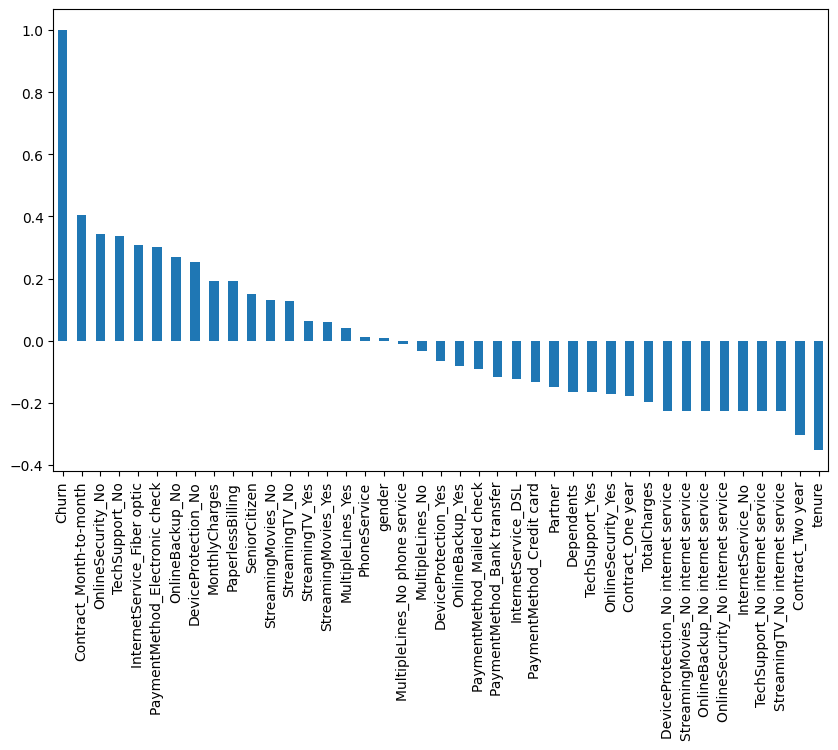

In [ ]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()

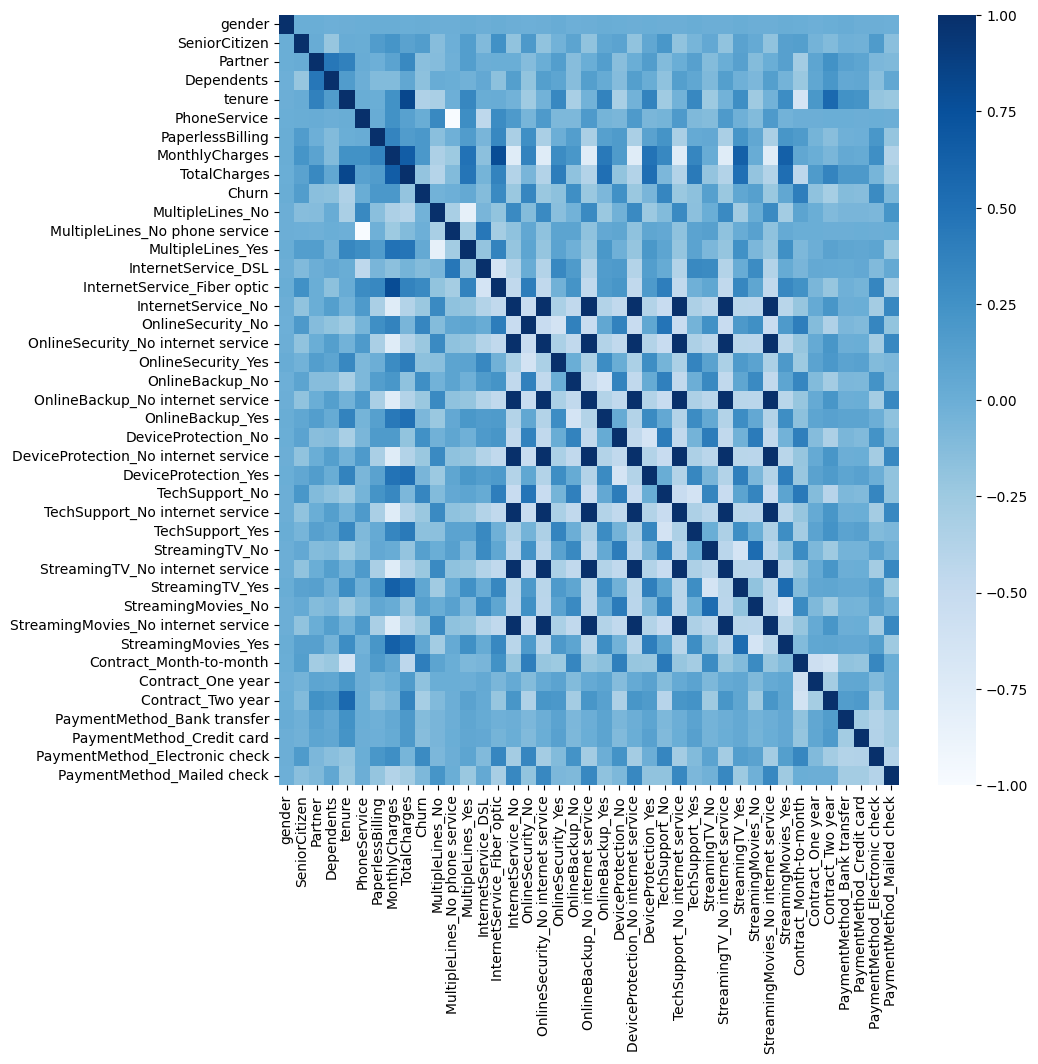

In [ ]:
fig,ax= plt.subplots(figsize=(10,10))
ax=sns.heatmap(corr_matrix, cmap="Blues")

#Podjela skupa podataka

Skup podataka podijelit će se na sljedeći način:


*   Train : 70%
*   Validation : 20%
*   Test : 10%



In [ ]:
X = df2.drop(columns=['Churn'])
y = df2['Churn']

In [ ]:
X_, X_test, y_, y_test = train_test_split(X, y, stratify = y, random_state = 42, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, stratify = y_, random_state = 42, test_size = 2/9)

In [ ]:
print(f"Skup podataka za treniranje: {(len(X_train)/len(X)*100):.2f}%")
print(f"Skup podataka za validaciju: {(len(X_val)/len(X)*100):.2f}%")
print(f"Skup podataka za testiranje: {(len(X_test)/len(X)*100):.2f}%")

Skup podataka za treniranje: 69.98%
Skup podataka za validaciju: 20.01%
Skup podataka za testiranje: 10.01%


In [ ]:
metrike_lista= [
    tf.keras.metrics.AUC(name="auc"),
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Recall(name="recall")
]

In [ ]:
X_train.shape[1]

40

Definirana je funkcija konstrukcija_modela koja kreira testnu neuronsku mrežu, koja konstrukcijom odgovara potpuno povezanoj neuronskoj mreži odnosno višeslojni perceptron (eng. Multilayer perceptron, MLP ), na kojoj će se obavljati ispitivanja utjecaja hiperparametara. Testna neuronska mreža sastoji se od 4 sloja (3 skirvena sloja i 1 izlazni sloj) početna konstrukcija sastoji se od:
* 64 neurona u prvom skrivenom sloju
* 64 neurona u drugom skrivenom sloju
* 64 neurona u trećem skrivenom sloju
* 1 neurona u izlaznom sloju zbog toga što je tražena vrijednost iz atribut 'Churn'.
* aktivacijsku funkciju 'relu' u skrivenim slojevima
* aktivacijsku funkciju sigmoid u izlaznom sloju
* optimizator adam
* binarna korentropija kao loss funkcija

S obzirom na odabir broja skrivenih slojeva za neuronsku mrežu na koji utječu brojni parametri kao što su: složenost ispitivanja, veličina i kompleksnost podataka i sl. Odabrana je mreža koja se sastoji od 3 skrivena sloja i 1 izlaznim slojem kako bi mreža bila u stanju pravilno naučiti podatke svijesni posljedica koje prekomjerna upotreba slojeva u neuronskoj mreži može donijeti, a neke od posljedica su prenaučenost, dugotrajno vrijeme učenja mreže te povećanjem broja slojeva ne mora dovesti do boljih rezultata modela.

što se tiče odabira broja neurona po slojevima nema striktno definirane formule koju možemo upotrijebiti za konstruiranje mreže, no međutim postoje "pravila" koja nam mogu pomoći kod definiranja broja neurona unutar slojeva, a to su:
* Broj skrivenih neurona trebao bi biti između veličine ulaznog sloja i veličine izlaznog sloja.
* Broj skrivenih neurona trebao bi biti 2/3 veličine ulaznog sloja, plus veličina izlaznog sloja.
* Broj skrivenih neurona trebao bi biti manji od dvostruko veće veličine ulaznog sloja.

Za testnu neuronsku mrežu postavljen je jednak broj neurona po slojevima, koja će se kasnije tijekom ispitivanja parametara modela mijenjati.

Kao aktivacijska funkcija, čija je uloga izračun izlaza neurona na osnovu pojedinačnih ulaza u neuron i njihovih težina, skrivenih slojeva odabrana je 'ReLU' koja spada u 'piecewise' aktivacijske funkcije:
\begin{cases}
x & \text{ako } x > 0 \\
0 & \text{ako } x \leq 0
\end{cases}
koja vrijednosti manje od nula bilježi kao 0 dok ostale vrijednosti X odgovaraju [x,x]. Glani nedostatci su joj što sve negativne vrijednosti klasificira kao 0 što utječe na učenje modela što se može izbjeći korištenjem drugih sličnih vrsta ReLU aktivacijske funkcije kao: leaky ReLU, exponential linear unit (ELU) and Sigmoid linear unit (SiLU).

Za aktivacijsku funkciju izlaznog sloja odabrana je 'Sigmoid' aktivacijska funkcija zbog toga što traženi podacim imaju vrijednost ili 1 ili 0 što predstavlja problem binarne klasifikacije.

Kao optimizator modela odabran je optimizator 'Adam' algoritam koji je kombinacija dvaju optimizatora Adagrad i RMSProp: AdaGrad koji odražava stopu učenja za svaki parametar pojedinačno na temelju kumulativnog kvadrata svih prošlih gradijenata za svaki parametar, dok RMSProp koristi eksponencijalno pomični prosjek kvadrata gradijenata te odražava stabilniju stopu učenja. Adam koristi najbolja svojstva od jednog i drugog optimizatora tj. izračunava eksopnencijalno pomični prosjek gradijenata i kvadratnog gradijenta, a parametri beta1 i beta2 kontroliraju stopu opadanja tih pomičnih prosjeka.

In [ ]:
def konstrukcija_modela (ulaz = X_train.shape[1], sloj_1 = 64, sloj_2 = 64, sloj_3 = 64, sloj_4 = 1, akt_funkcija_1 = 'relu', akt_funkcija_2 = 'sigmoid', optimizer = 'adam', loss_funkcija = 'binary_crossentropy'):
  tf.keras.backend.clear_session()
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(sloj_1, activation = akt_funkcija_1, input_dim = ulaz),
      tf.keras.layers.Dense(sloj_2, activation = akt_funkcija_1),
      tf.keras.layers.Dense(sloj_3, activation = akt_funkcija_1),
      tf.keras.layers.Dense(sloj_4, activation = akt_funkcija_2)
  ])

  model.compile(
      optimizer = optimizer,
      loss = loss_funkcija,
      metrics = metrike_lista
  )

  return model

In [ ]:
model_pr = konstrukcija_modela(ulaz = X_train.shape[1])

In [ ]:
model_pr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2624      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11009 (43.00 KB)
Trainable params: 11009 (43.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


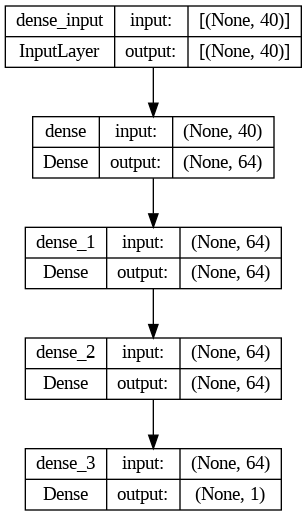

In [ ]:
tf.keras.utils.plot_model(model_pr, show_shapes=True)

In [ ]:
Model_History = {}
epochs = 50
batch_size = 40

In [ ]:
checkpoint_model = tf.keras.callbacks.ModelCheckpoint('ANN_best_val_acc.h5',
                                                     monitor='val_accuracy',
                                                     verbose=1,
                                                     save_best_only=True,
                                                     mode='max')

ModelCheckpoint se koristi za spremanje najboljeg modela tijekom treniranja, odnosno spremaju se težine modela na osnovu validacijske preciznosti modela.

In [ ]:
Model_History['Probni_Model'] = model_pr.fit(
    X_train, y_train, epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint_model]
).history

Epoch 1/50
155/155 [==============================] - ETA: 0s - loss: 0.4592 - auc: 0.8043 - accuracy: 0.7736 - recall: 0.3532
Epoch 1: val_accuracy improved from -inf to 0.78779, saving model to ANN_best_val_acc.h5
155/155 [==============================] - 7s 11ms/step - loss: 0.4592 - auc: 0.8043 - accuracy: 0.7736 - recall: 0.3532 - val_loss: 0.4341 - val_auc: 0.8316 - val_accuracy: 0.7878 - val_recall: 0.5294
Epoch 2/50
 24/155 [===>..........................] - ETA: 0s - loss: 0.4163 - auc: 0.8367 - accuracy: 0.8034 - recall: 0.5208

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


153/155 [============================>.] - ETA: 0s - loss: 0.4242 - auc: 0.8390 - accuracy: 0.7996 - recall: 0.5365
Epoch 2: val_accuracy improved from 0.78779 to 0.79205, saving model to ANN_best_val_acc.h5
155/155 [==============================] - 1s 6ms/step - loss: 0.4231 - auc: 0.8399 - accuracy: 0.8004 - recall: 0.5382 - val_loss: 0.4275 - val_auc: 0.8395 - val_accuracy: 0.7921 - val_recall: 0.4572
Epoch 3/50
152/155 [============================>.] - ETA: 0s - loss: 0.4197 - auc: 0.8419 - accuracy: 0.8045 - recall: 0.5538
Epoch 3: val_accuracy did not improve from 0.79205
155/155 [==============================] - 1s 7ms/step - loss: 0.4184 - auc: 0.8427 - accuracy: 0.8052 - recall: 0.5550 - val_loss: 0.4351 - val_auc: 0.8388 - val_accuracy: 0.7871 - val_recall: 0.3850
Epoch 4/50
151/155 [============================>.] - ETA: 0s - loss: 0.4154 - auc: 0.8465 - accuracy: 0.8034 - recall: 0.5366
Epoch 4: val_accuracy did not improve from 0.79205
155/155 [=========================

In [ ]:
rollback_model = tf.keras.models.load_model('ANN_best_val_acc.h5')

In [ ]:
for model_name, model_history in Model_History.items():
    df_name = str(model_name)+"_df"
    locals()[df_name] = pd.DataFrame(model_history, index = (range(1, epochs+1)))

In [ ]:
print("Metrike za konstruirani model: ")
metrike_zapis=Probni_Model_df
metrike_zapis

Metrike za konstruirani model: 


loss       auc  accuracy    recall  val_loss   val_auc  val_accuracy  \
1   0.459202  0.804327  0.773585  0.353211  0.434128  0.831608      0.787793   
2   0.423129  0.839889  0.800365  0.538226  0.427495  0.839539      0.792051   
3   0.418447  0.842729  0.805234  0.555046  0.435098  0.838845      0.787083   
4   0.414503  0.847080  0.804423  0.537462  0.431922  0.840371      0.790632   
5   0.412626  0.848560  0.805031  0.562691  0.426227  0.840607      0.784244   
6   0.408773  0.852532  0.806046  0.523700  0.431179  0.837883      0.785664   
7   0.404572  0.855411  0.810915  0.558104  0.428898  0.840624      0.786373   
8   0.402525  0.857100  0.809292  0.558104  0.431942  0.834359      0.780696   
9   0.398726  0.859630  0.815581  0.558869  0.430814  0.836543      0.788502   
10  0.391725  0.865352  0.817610  0.561927  0.431586  0.836161      0.788502   
11  0.390513  0.866788  0.817407  0.572630  0.441500  0.830006      0.789922   
12  0.384826  0.870900  0.819233  0.564220  0.443087  0.835423      0.790632   
13  0.382090  0.873282  0.822276  0.571101  0.439713  0.832646      0.783534   
14  0.376997  0.876858  0.824508  0.578746  0.450081  0.829232      0.786373   
15  0.374785  0.878667  0.824914  0.585627  0.450442  0.820091      0.777147   
16  0.369619  0.882300  0.827551  0.591743  0.461305  0.831144      0.792761   
17  0.364929  0.885835  0.829986  0.613150  0.470832  0.823197      0.779276   
18  0.357954  0.890088  0.832420  0.587920  0.470393  0.821907      0.777147   
19  0.355825  0.891769  0.832623  0.610092  0.463843  0.819756      0.785664   
20  0.351910  0.894173  0.834246  0.611621  0.467131  0.822324      0.779986   
21  0.348737  0.896277  0.826537  0.576453  0.478684  0.822956      0.778566   
22  0.339051  0.902833  0.843579  0.642202  0.481800  0.819245      0.779276   
23  0.332722  0.908109  0.847231  0.645260  0.506936  0.803271      0.767211   
24  0.325995  0.911359  0.847636  0.645260  0.522683  0.820566      0.784244   
25  0.322107  0.913584  0.849057  0.665138  0.502192  0.798057      0.767211   
26  0.317900  0.916406  0.851085  0.661315  0.525980  0.808104      0.772889   
27  0.313056  0.919089  0.855955  0.678899  0.520452  0.797569      0.766501   
28  0.307456  0.922060  0.859201  0.688073  0.525190  0.801549      0.774308   
29  0.299134  0.926740  0.860621  0.694190  0.563107  0.802304      0.777147   
30  0.299412  0.925865  0.858592  0.704128  0.552307  0.795633      0.765791   
31  0.292143  0.929912  0.862041  0.699541  0.554008  0.808207      0.770759   
32  0.285065  0.934276  0.872997  0.725535  0.564637  0.807206      0.763662   
33  0.275086  0.938959  0.874620  0.736239  0.609538  0.798772      0.772179   
34  0.269815  0.941337  0.878880  0.745413  0.609863  0.782163      0.752307   
35  0.268374  0.941556  0.876648  0.747706  0.615067  0.782302      0.755855   
36  0.267632  0.942252  0.877663  0.743884  0.616523  0.792130      0.762952   
37  0.251001  0.949951  0.887198  0.766055  0.684931  0.794339      0.775018   
38  0.244887  0.952340  0.892270  0.779052  0.679180  0.756721      0.738822   
39  0.245243  0.951953  0.890241  0.787462  0.679846  0.771420      0.752307   
40  0.247037  0.951418  0.884764  0.751529  0.661776  0.791768      0.763662   
41  0.247328  0.950695  0.887807  0.779817  0.685102  0.788531      0.743080   
42  0.243596  0.952796  0.887401  0.793578  0.685513  0.777233      0.761533   
43  0.229029  0.959044  0.899168  0.796636  0.730064  0.776778      0.756565   
44  0.223167  0.960519  0.899168  0.799694  0.686032  0.782411      0.748758   
45  0.218228  0.963071  0.904443  0.811927  0.764020  0.785166      0.775018   
46  0.213330  0.964559  0.903023  0.810398  0.795203  0.784363      0.772889   
47  0.205977  0.967031  0.911747  0.824924  0.781797  0.775281      0.755855   
48  0.200211  0.968927  0.910529  0.818807  0.785017  0.777819      0.751597   
49  0.204181  0.967085  0.909718  0.820336  0.783793  0.774675      0.764372   
50  0.22

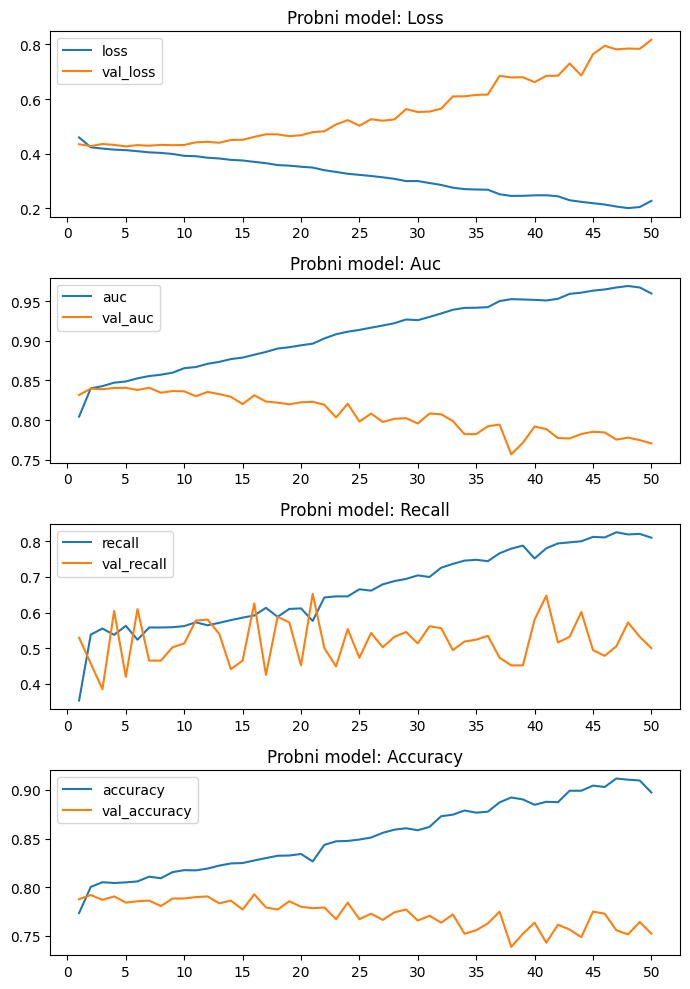

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(7,10))
xticks = range(0, 51, 5)

metrike_zapis[["loss", "val_loss"]].plot.line(title="Probni model: Loss", ax=axes[0])
axes[0].set_xticks(xticks)
metrike_zapis[["auc", "val_auc"]].plot.line(title="Probni model: Auc", ax=axes[1])
axes[1].set_xticks(xticks)
metrike_zapis[["recall", "val_recall"]].plot.line(title="Probni model: Recall", ax=axes[2])
axes[2].set_xticks(xticks)
metrike_zapis[["accuracy", "val_accuracy"]].plot.line(title="Probni model: Accuracy", ax=axes[3])
axes[3].set_xticks(xticks)
plt.tight_layout()
plt.show()

čini se da model neuronske mreže pokazuje znakove prenaučenosti. To je vidljivo iz grafikona gubitka (Loss) gdje se gubitak na skupu za validaciju povećava s vremenom, dok se gubitak na skupu za treniranje smanjuje. Ovo ukazuje na to da model dobro uči podatke za treniranje, ali ne generalizira dobro na nove, neviđene podatke. Što  se tiče AUC (Area Under the Curve) ostaje relativno stabilan, ali je AUC za treniranje konzistentno viši od AUC-a za validaciju, što također može biti znak prenaučenosti. Recall metrika varira i pokazuje sličan trend s većim vrijednostima za skup za treniranje u usporedbi sa skupom za validaciju. Točnost (Accuracy) se povećava tijekom vremena za oba skupa, ali se stabilizira prema kraju, što može ukazivati na to da model više ne uči iz podataka kako bi poboljšao svoju generalizacijsku sposobnost.

In [ ]:
testiranje_modela = rollback_model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 4ms/step - loss: 0.4503 - auc: 0.8337 - accuracy: 0.7887 - recall: 0.5936


In [ ]:
mesure = rollback_model.predict(X_test)
model_izracun = np.where(mesure > 0.5, 1, 0)

23/23 [==============================] - 0s 2ms/step


In [ ]:
print(f"Metrike:\n{classification_report(y_test, model_izracun,digits=4)}")
print(f"Matrica konfuzije:\n{confusion_matrix(y_test, model_izracun)}")

mjerenje_1 = tf.keras.metrics.AUC()
mjerenje_1.update_state(y_test, model_izracun)
print(f"\nAUC: {((mjerenje_1.result())*100):.2f}%")

Metrike:
              precision    recall  f1-score   support

           0     0.8541    0.8591    0.8566       518
           1     0.6033    0.5936    0.5984       187

    accuracy                         0.7887       705
   macro avg     0.7287    0.7263    0.7275       705
weighted avg     0.7876    0.7887    0.7881       705

Matrica konfuzije:
[[445  73]
 [ 76 111]]

AUC: 72.63%


Iz navedenih metrika može se uočiti da je model ima točnost 72.63%. Bolji  je u otkrivanju instanci podataka koje imaju vrijednost 0 nego 1 što se može uočiti iz većih vrijednosti preciznosti. Iz matrice konfuzije može se uočiti da model najveće pogreške čini kod klasificiranja instanci podataka kao klase 0 umjesto klase 1.

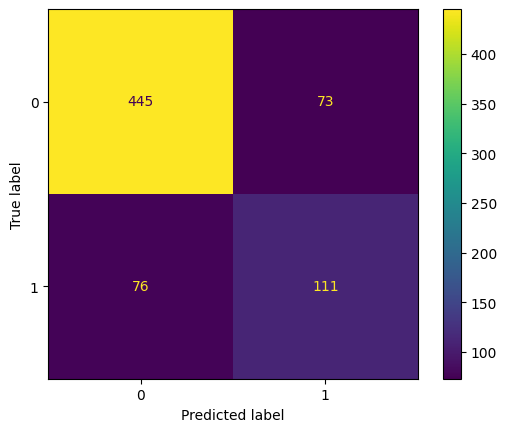

In [ ]:
matrica_konfuzije = metrics.confusion_matrix(y_test, model_izracun)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrica_konfuzije)
cm_display.plot()
plt.show()

#Sempliranje podataka

S obzirom da je broj korisnika koji je ostao (5174) kao klijent telekomunikacijske kompanije znatno veći od broja korisnik koji je napustio (1869) telekomunikacijsku kompaniju koristi se tehnika sempliranja podataka. Sempliranje se koristi u svrhu uravnotežavanja veličine skupova podataka te  poboljšavanje performansi modela. Koriste se tehnike sempliranja:
* SMOTE Oversampling
* SMOTE Undersampling
* SMOTEENN
* SMOTETomek

##SMOTE Oversampling

SMOTE Oversampling funkcionira na način da odabire primjere iz manjinske klase te na osnovu odabranih primjera pronalazi najbliže susjede koristeći Euklidsku udaljenost. Nakon određivanja najbližih susjeda SMOTE generira nove sintetičke podatke uzimajući u obzir podatke odabranog primjera i pronađenog susjeda. Sljedeća slika prikazuje djelovanje SMOTE Oversamplinga.

![picture](https://miro.medium.com/v2/resize:fit:850/1*QaNfJwU6P-VnG1zp3U4cVg.png)

In [ ]:
oversampling = SMOTE(random_state = 42 , sampling_strategy = 'minority')
X_train_oversampling, y_train_oversampling = oversampling.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

Churn
0    3621
1    1308
Name: count, dtype: int64

Primjernom SMOTE Oversampling tehnike izjednačava se broj primjera kod kojih atribut 'Churn' ima vrijednost 0 ili 1.

In [ ]:
y_train_oversampling.value_counts()

Churn
0    3621
1    3621
Name: count, dtype: int64

In [ ]:
model_history_oversampling = {}

In [ ]:
oversampling_model = konstrukcija_modela(ulaz = X_train_oversampling.shape[1])

In [ ]:
oversampling_checkpoint = tf.keras.callbacks.ModelCheckpoint('oversampling_best_result.h5',
                                                             monitor='val_accuracy',
                                                             verbose = 1,
                                                             save_best_only = True,
                                                             mode='max')

In [ ]:
model_history_oversampling['Oversampling_model'] = oversampling_model.fit(
    X_train_oversampling, y_train_oversampling, epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[oversampling_checkpoint]
).history

Epoch 1/50
227/227 [==============================] - ETA: 0s - loss: 0.4875 - auc: 0.8340 - accuracy: 0.7660 - recall: 0.7745
Epoch 1: val_accuracy improved from -inf to 0.76437, saving model to oversampling_best_result.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


227/227 [==============================] - 3s 9ms/step - loss: 0.4875 - auc: 0.8340 - accuracy: 0.7660 - recall: 0.7745 - val_loss: 0.4687 - val_auc: 0.8273 - val_accuracy: 0.7644 - val_recall: 0.6818
Epoch 2/50
219/227 [===========================>..] - ETA: 0s - loss: 0.4468 - auc: 0.8698 - accuracy: 0.7908 - recall: 0.8119
Epoch 2: val_accuracy did not improve from 0.76437
227/227 [==============================] - 1s 5ms/step - loss: 0.4451 - auc: 0.8710 - accuracy: 0.7915 - recall: 0.8141 - val_loss: 0.4989 - val_auc: 0.8314 - val_accuracy: 0.7480 - val_recall: 0.7513
Epoch 3/50
224/227 [============================>.] - ETA: 0s - loss: 0.4232 - auc: 0.8850 - accuracy: 0.8059 - recall: 0.8218
Epoch 3: val_accuracy did not improve from 0.76437
227/227 [==============================] - 1s 5ms/step - loss: 0.4232 - auc: 0.8850 - accuracy: 0.8059 - recall: 0.8219 - val_loss: 0.4935 - val_auc: 0.8287 - val_accuracy: 0.7417 - val_recall: 0.7487
Epoch 4/50
224/227 [=====================

In [ ]:
base_oversampling_model = tf.keras.models.load_model('oversampling_best_result.h5')

In [ ]:
for model_name, model_history in model_history_oversampling.items():
  df_name = str(model_name)+"_df"
  locals()[df_name] = pd.DataFrame(model_history, index=(range(1,epochs+1)))

In [ ]:
oversampling_df = Oversampling_model_df
oversampling_df

loss       auc  accuracy    recall  val_loss   val_auc  val_accuracy  \
1   0.487481  0.833965  0.766039  0.774468  0.468747  0.827273      0.764372   
2   0.445073  0.870963  0.791494  0.814140  0.498853  0.831363      0.748048   
3   0.423233  0.885045  0.805855  0.821872  0.493498  0.828717      0.741661   
4   0.407200  0.894118  0.812897  0.838995  0.516529  0.834466      0.750887   
5   0.392390  0.902917  0.820630  0.834300  0.462954  0.833886      0.779986   
6   0.375920  0.911382  0.826705  0.847280  0.496632  0.822603      0.755855   
7   0.368522  0.914978  0.834438  0.850041  0.573191  0.829784      0.724627   
8   0.359910  0.919070  0.835819  0.851146  0.495778  0.830848      0.777857   
9   0.351268  0.923141  0.842723  0.855012  0.461658  0.824742      0.782115   
10  0.347788  0.924684  0.842999  0.857222  0.469453  0.831597      0.784244   
11  0.340140  0.927940  0.850179  0.864954  0.506800  0.827423      0.760823   
12  0.334934  0.930092  0.851284  0.862193  0.525248  0.823448      0.755145   
13  0.325488  0.934448  0.857222  0.869649  0.506805  0.817850      0.760114   
14  0.320636  0.936089  0.858326  0.870478  0.492526  0.825541      0.773598   
15  0.319094  0.936675  0.856117  0.872135  0.486115  0.812780      0.778566   
16  0.314590  0.938661  0.862055  0.875173  0.502884  0.826817      0.773598   
17  0.308489  0.941199  0.862193  0.872963  0.540094  0.816557      0.750887   
18  0.302251  0.943343  0.869787  0.878487  0.477769  0.822282      0.784244   
19  0.296352  0.945783  0.871444  0.888705  0.522254  0.815000      0.770759   
20  0.292063  0.947085  0.872825  0.876001  0.610995  0.805899      0.728886   
21  0.290511  0.947741  0.871859  0.879591  0.533011  0.815649      0.766501   
22  0.287087  0.949111  0.876968  0.890362  0.517424  0.818326      0.782115   
23  0.280012  0.951468  0.879729  0.890362  0.513338  0.816048      0.777147   
24  0.273942  0.953791  0.884700  0.897818  0.538370  0.806957      0.772889   
25  0.275088  0.953203  0.880558  0.893123  0.559438  0.799804      0.753016   
26  0.269132  0.955130  0.879867  0.892019  0.594687  0.791135      0.729595   
27  0.263680  0.956901  0.886357  0.900304  0.608049  0.804965      0.742370   
28  0.267072  0.955703  0.881110  0.891466  0.539671  0.805944      0.768630   
29  0.257827  0.958945  0.890086  0.897266  0.567394  0.795181      0.748758   
30  0.253017  0.960278  0.889533  0.903894  0.568557  0.808959      0.767211   
31  0.248506  0.961668  0.892847  0.903618  0.614242  0.796220      0.750177   
32  0.244467  0.962991  0.896161  0.910246  0.627839  0.803936      0.757984   
33  0.246851  0.962305  0.893814  0.906379  0.592603  0.805953      0.765791   
34  0.241227  0.963976  0.899199  0.909141  0.620239  0.796076      0.744500   
35  0.239107  0.964395  0.895747  0.906932  0.684725  0.796524      0.742370   
36  0.234167  0.966008  0.899475  0.911074  0.615163  0.798469      0.750177   
37  0.228015  0.967616  0.902099  0.913007  0.606414  0.803108      0.764372   
38  0.233322  0.965831  0.899613  0.912179  0.598859  0.800012      0.758694   
39  0.218793  0.970347  0.905413  0.917702  0.647988  0.798219      0.758694   
40  0.225820  0.968126  0.903756  0.916874  0.664675  0.803384      0.764372   
41  0.216209  0.970664  0.907898  0.920464  0.658145  0.780359      0.745209   
42  0.208569  0.972653  0.913422  0.928197  0.682868  0.794539      0.758694   
43  0.208142  0.973007  0.912179  0.923778  0.654321  0.788728      0.758694   
44  0.204720  0.973592  0.914112  0.923778  0.767490  0.770942      0.718240   
45  0.204287  0.973619  0.912179  0.927644  0.705887  0.787593      0.745209   
46  0.195136  0.976248  0.915769  0.926540  0.715923  0.790358      0.762952   
47  0.197181  0.975745  0.915907  0.926540  0.758688  0.791965      0.756565   
48  0.195334  0.976052  0.917150  0.932063  0.757626  0.788048      0.756565   
49  0.199378  0.974579  0.915079  0.927920  0.718806  0.786954      0.757275   
50  0.19

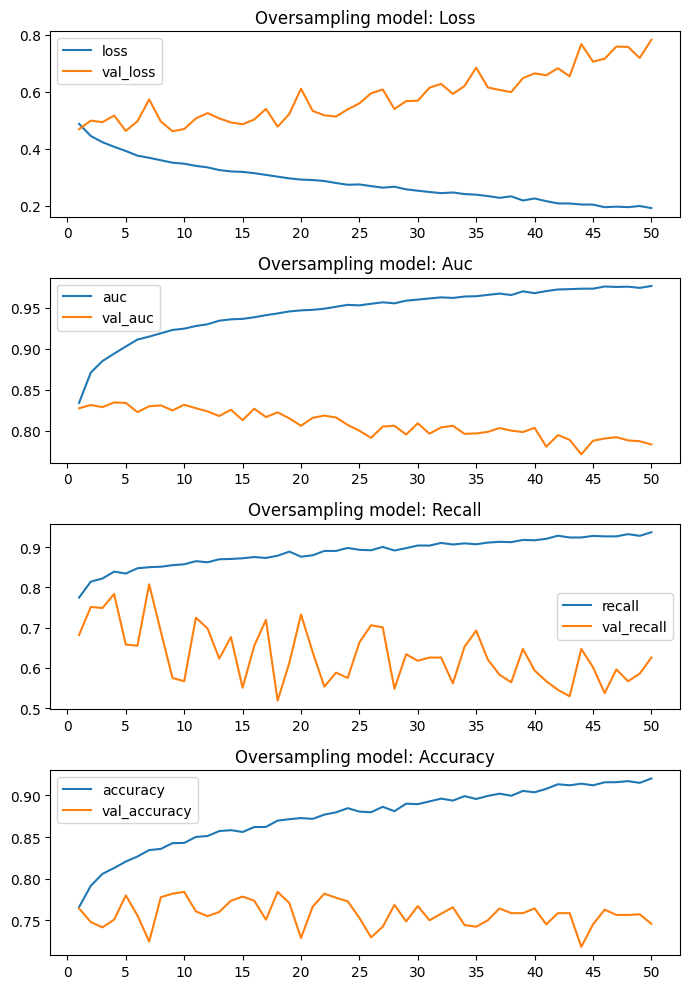

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(7,10))
xticks = range(0, 51, 5)

oversampling_df[["loss", "val_loss"]].plot.line(title="Oversampling model: Loss", ax = axes[0])
axes[0].set_xticks(xticks)
oversampling_df[["auc", "val_auc"]].plot.line(title="Oversampling model: Auc", ax = axes[1])
axes[1].set_xticks(xticks)
oversampling_df[["recall", "val_recall"]].plot.line(title="Oversampling model: Recall", ax = axes[2])
axes[2].set_xticks(xticks)
oversampling_df[["accuracy", "val_accuracy"]].plot.line(title="Oversampling model: Accuracy", ax = axes[3])
axes[3].set_xticks(xticks)
plt.tight_layout()
plt.show()

In [ ]:
oversampling_testiranje = base_oversampling_model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 4ms/step - loss: 0.4834 - auc: 0.8195 - accuracy: 0.7759 - recall: 0.5294


In [ ]:
izracun = base_oversampling_model.predict(X_test)
izracun_tocno = np.where(izracun > 0.5, 1, 0)

23/23 [==============================] - 0s 2ms/step


In [ ]:
print(f"Metrike:\n{classification_report(y_test, izracun_tocno,digits=4)}")
print(f"Matrica konfuzije:\n{confusion_matrix(y_test, izracun_tocno)}")

mjerenje_2 = tf.keras.metrics.AUC()
mjerenje_2.update_state(y_test, izracun_tocno)
print(f"\nAUC: {((mjerenje_2.result())*100):.2f}%")

Metrike:
              precision    recall  f1-score   support

           0     0.8358    0.8649    0.8501       518
           1     0.5858    0.5294    0.5562       187

    accuracy                         0.7759       705
   macro avg     0.7108    0.6971    0.7031       705
weighted avg     0.7695    0.7759    0.7721       705

Matrica konfuzije:
[[448  70]
 [ 88  99]]

AUC: 69.71%


Prema rezultatima metrika vidljivo je da tehnika izjednačavanja manjinske klase sa većinskom nije dovela do poboljšanja, naime blago su se pogoršale. Sljedeća tehnika sempliranja je SMOTE Undersampling

##SMOTE Undersampling

SMOTE Undersampling funkcionira suprotno od Oversamplinga tako da smanjiva broj primjera većinske klase na broj primjera manjinske klase. Primjeri koji se uklanjaju iz skupa većinske klase odabiru se slučajno.

![picture](https://www.blog.trainindata.com/wp-content/uploads/2023/03/undersampling-1024x576.png)

In [ ]:
undersampling = RandomUnderSampler( random_state = 42, sampling_strategy = 'majority')
X_train_undersampling, y_train_undersampling = undersampling.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

Churn
0    3621
1    1308
Name: count, dtype: int64

In [ ]:
y_train_undersampling.value_counts()

Churn
0    1308
1    1308
Name: count, dtype: int64

In [ ]:
model_history_undersampling = {}

In [ ]:
undersampling_model = konstrukcija_modela( ulaz = X_train_undersampling.shape[1])

In [ ]:
undersampling_checkpoint = tf.keras.callbacks.ModelCheckpoint('undersampling_best_result.h5',
                                                              monitor='val_accuracy',
                                                              verbose = 1,
                                                              save_best_only = True,
                                                              mode='max')

In [ ]:
model_history_undersampling['Undersampling_model'] = undersampling_model.fit(
    X_train_undersampling, y_train_undersampling, epochs=epochs,
    validation_data = (X_val, y_val),
    callbacks=[undersampling_checkpoint]
).history

Epoch 1/50
71/82 [========================>.....] - ETA: 0s - loss: 0.5386 - auc: 0.7934 - accuracy: 0.7460 - recall: 0.7293
Epoch 1: val_accuracy improved from -inf to 0.73031, saving model to undersampling_best_result.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


82/82 [==============================] - 3s 17ms/step - loss: 0.5326 - auc: 0.7974 - accuracy: 0.7478 - recall: 0.7325 - val_loss: 0.5300 - val_auc: 0.8334 - val_accuracy: 0.7303 - val_recall: 0.8128
Epoch 2/50
80/82 [============================>.] - ETA: 0s - loss: 0.4849 - auc: 0.8469 - accuracy: 0.7676 - recall: 0.7866
Epoch 2: val_accuracy did not improve from 0.73031
82/82 [==============================] - 1s 7ms/step - loss: 0.4853 - auc: 0.8465 - accuracy: 0.7672 - recall: 0.7890 - val_loss: 0.5621 - val_auc: 0.8386 - val_accuracy: 0.7189 - val_recall: 0.8476
Epoch 3/50
73/82 [=========================>....] - ETA: 0s - loss: 0.4728 - auc: 0.8549 - accuracy: 0.7765 - recall: 0.7924
Epoch 3: val_accuracy did not improve from 0.73031
82/82 [==============================] - 1s 6ms/step - loss: 0.4744 - auc: 0.8535 - accuracy: 0.7745 - recall: 0.7936 - val_loss: 0.5690 - val_auc: 0.8389 - val_accuracy: 0.7083 - val_recall: 0.8663
Epoch 4/50
81/82 [============================>.] 

In [ ]:
base_model_undersampling = tf.keras.models.load_model('undersampling_best_result.h5')

In [ ]:
for model_name, model_history in model_history_undersampling.items():
  df_name = str(model_name)+"_df"
  locals() [df_name] = pd.DataFrame(model_history, index=(range(1, epochs+1)))

In [ ]:
Undersampling_model_metricks = Undersampling_model_df
Undersampling_model_metricks

loss       auc  accuracy    recall  val_loss   val_auc  val_accuracy  \
1   0.532643  0.797386  0.747826  0.732461  0.529963  0.833421      0.730305   
2   0.485271  0.846460  0.767202  0.788991  0.562084  0.838561      0.718950   
3   0.474444  0.853523  0.774465  0.793578  0.568990  0.838925      0.708304   
4   0.469120  0.857786  0.774847  0.804281  0.456995  0.840519      0.770759   
5   0.463339  0.861286  0.780199  0.785168  0.565866  0.841760      0.721079   
6   0.457574  0.865435  0.783639  0.807339  0.510520  0.841214      0.749468   
7   0.448677  0.870572  0.790902  0.804281  0.478568  0.839934      0.755855   
8   0.447214  0.871125  0.782492  0.805046  0.565700  0.840094      0.718240   
9   0.441798  0.874366  0.792813  0.813456  0.524954  0.840035      0.735983   
10  0.435307  0.877842  0.795489  0.813456  0.541565  0.837409      0.725337   
11  0.429339  0.882014  0.805428  0.830275  0.500195  0.832687      0.752307   
12  0.422627  0.885864  0.807339  0.821101  0.515630  0.835744      0.740241   
13  0.413480  0.890704  0.804664  0.832569  0.523752  0.834469      0.746629   
14  0.410597  0.892244  0.805810  0.828746  0.535373  0.830754      0.745209   
15  0.408888  0.892888  0.807339  0.830275  0.533042  0.834117      0.749468   
16  0.399557  0.897776  0.814602  0.837920  0.562688  0.825714      0.729595   
17  0.394970  0.900235  0.822630  0.843272  0.627318  0.828167      0.702626   
18  0.389822  0.902514  0.823012  0.841743  0.517636  0.825636      0.738112   
19  0.376469  0.909952  0.829128  0.856269  0.548917  0.819817      0.741661   
20  0.373360  0.910945  0.832569  0.857034  0.600946  0.821237      0.703336   
21  0.361139  0.918071  0.832569  0.860092  0.616730  0.822933      0.721789   
22  0.360137  0.917246  0.836774  0.855505  0.638680  0.818841      0.703336   
23  0.353834  0.920754  0.841743  0.864679  0.625869  0.814298      0.707594   
24  0.342897  0.925367  0.850153  0.880734  0.614606  0.809528      0.714691   
25  0.331951  0.930902  0.849006  0.872324  0.674419  0.804273      0.691980   
26  0.329260  0.931440  0.853976  0.881498  0.613735  0.814467      0.727466   
27  0.320524  0.935489  0.855122  0.876911  0.707226  0.803273      0.688432   
28  0.313982  0.937837  0.855887  0.879969  0.632782  0.805831      0.720369   
29  0.308385  0.940534  0.862385  0.893731  0.643416  0.810499      0.745209   
30  0.300571  0.943350  0.862385  0.891437  0.727069  0.798518      0.688432   
31  0.294017  0.946259  0.868502  0.895260  0.637726  0.800306      0.729595   
32  0.292930  0.946386  0.870413  0.891437  0.713527  0.789988      0.691270   
33  0.285677  0.949108  0.870413  0.896024  0.710736  0.789111      0.700497   
34  0.270651  0.954690  0.874618  0.894495  0.713380  0.793936      0.732434   
35  0.267500  0.955554  0.881498  0.899083  0.727632  0.792955      0.700497   
36  0.259099  0.958524  0.883027  0.904434  0.730303  0.790842      0.717530   
37  0.253111  0.960236  0.889144  0.913609  0.740126  0.789251      0.721789   
38  0.258694  0.958621  0.885703  0.911315  0.725666  0.774710      0.711143   
39  0.247045  0.962240  0.891437  0.918196  0.796570  0.794169      0.719659   
40  0.241192  0.963941  0.891055  0.909786  0.731367  0.791027      0.731015   
41  0.235774  0.965726  0.894878  0.919725  0.875593  0.775959      0.687722   
42  0.228867  0.967954  0.900229  0.915138  0.862457  0.787057      0.700497   
43  0.223724  0.969382  0.902141  0.922018  0.808160  0.785720      0.726757   
44  0.227354  0.967975  0.901758  0.917431  0.829027  0.790080      0.718240   
45  0.213752  0.972231  0.905581  0.922018  0.993018  0.791356      0.700497   
46  0.213346  0.971830  0.913609  0.933486  0.917957  0.789289      0.704755   
47  0.209574  0.972606  0.908257  0.928135  0.883166  0.777552      0.711143   
48  0.211188  0.972495  0.909021  0.925841  0.973190  0.779507      0.684883   
49  0.198385  0.976364  0.914373  0.924312  0.930212  0.784027      0.725337   
50  0.19

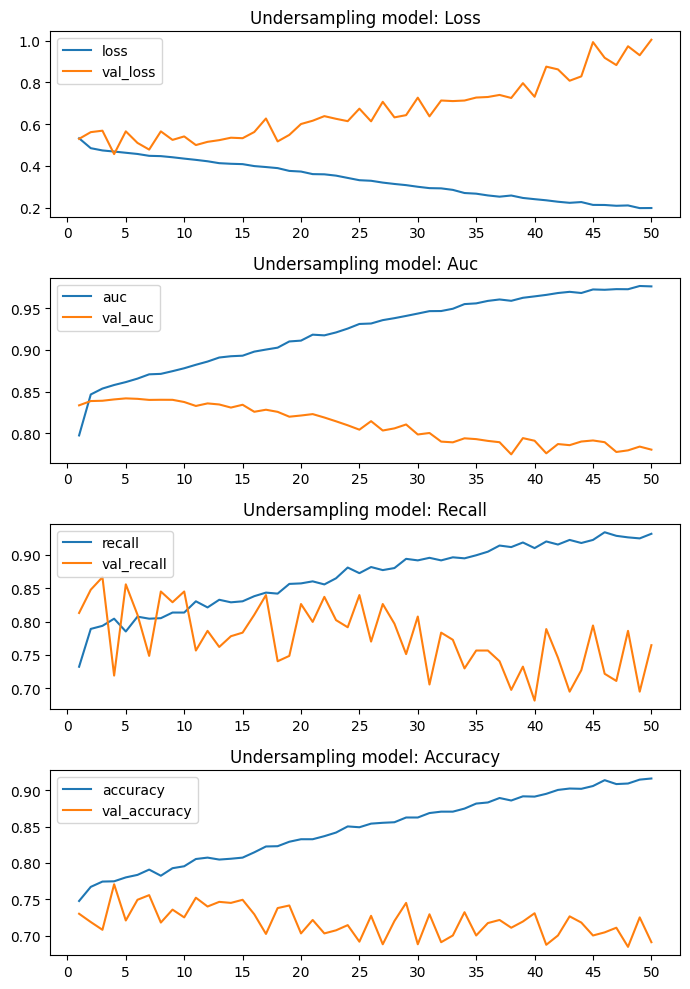

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(7,10))
xticks = range(0, 51, 5)

Undersampling_model_metricks[["loss", "val_loss"]].plot.line(title="Undersampling model: Loss", ax = axes[0])
axes[0].set_xticks(xticks)
Undersampling_model_metricks[["auc", "val_auc"]].plot.line(title="Undersampling model: Auc", ax = axes[1])
axes[1].set_xticks(xticks)
Undersampling_model_metricks[["recall", "val_recall"]].plot.line(title="Undersampling model: Recall", ax = axes[2])
axes[2].set_xticks(xticks)
Undersampling_model_metricks[["accuracy", "val_accuracy"]].plot.line(title="Undersampling model: Accuracy", ax = axes[3])
axes[3].set_xticks(xticks)
plt.tight_layout()
plt.show()

In [ ]:
undersampling_test = base_model_undersampling.evaluate(X_test, y_test)

23/23 [==============================] - 1s 10ms/step - loss: 0.4420 - auc: 0.8454 - accuracy: 0.7773 - recall: 0.6845


In [ ]:
izracun_u = base_model_undersampling.predict(X_test)
undersampling_izracun = np.where(izracun_u > 0.5, 1, 0)

23/23 [==============================] - 0s 3ms/step


In [ ]:
print(f"Metrike:\n{classification_report(y_test, undersampling_izracun,digits=4)}")
print(f"Matrica konfuzije:\n{confusion_matrix(y_test, undersampling_izracun)}")

mjerenje_3 = tf.keras.metrics.AUC()
mjerenje_3.update_state(y_test, undersampling_izracun)
print(f"\nAUC: {((mjerenje_3.result())*100):.2f}%")

Metrike:
              precision    recall  f1-score   support

           0     0.8768    0.8108    0.8425       518
           1     0.5664    0.6845    0.6199       187

    accuracy                         0.7773       705
   macro avg     0.7216    0.7477    0.7312       705
weighted avg     0.7945    0.7773    0.7835       705

Matrica konfuzije:
[[420  98]
 [ 59 128]]

AUC: 74.77%


Iz rezultata metrika vidljivo je da sa tehnikom SMOTE Undersampling poboljšala se točnost i preciznost modela.

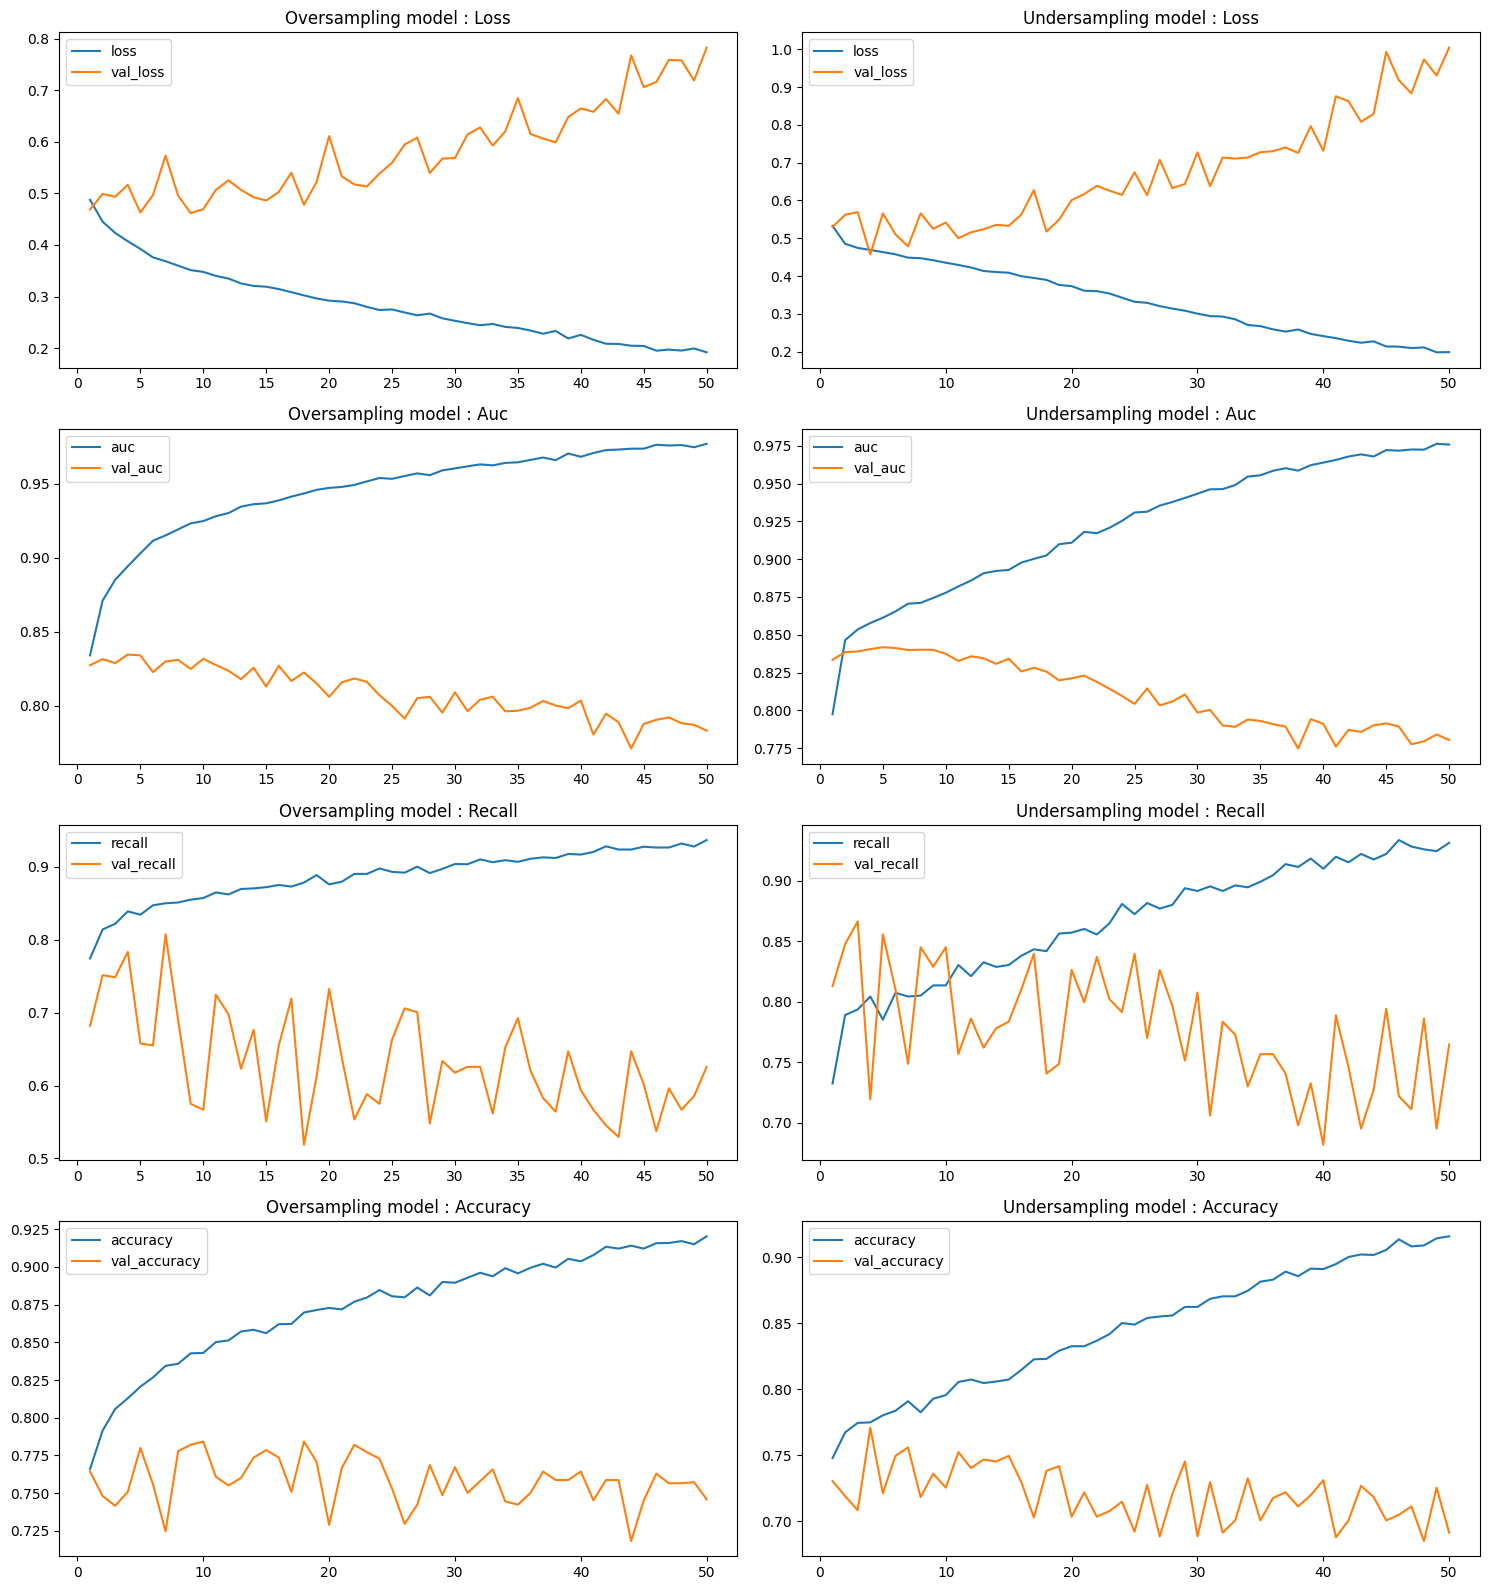

In [ ]:
fig, axes = plt.subplots(4, 2, figsize = (15, 16))
xticks = range(0,51,5)
oversampling_df[["loss","val_loss"]].plot.line(title = "Oversampling model : Loss", ax = axes[0,0])
axes[0,0].set_xticks(xticks)
Undersampling_model_metricks[["loss", "val_loss"]].plot.line(title = "Undersampling model : Loss", ax = axes[0,1])
oversampling_df[["auc","val_auc"]].plot.line(title = "Oversampling model : Auc", ax = axes[1,0])
axes[1,0].set_xticks(xticks)
Undersampling_model_metricks[["auc", "val_auc"]].plot.line(title = "Undersampling model : Auc", ax = axes[1,1])
axes[1,1].set_xticks(xticks)
oversampling_df[["recall","val_recall"]].plot.line(title = "Oversampling model : Recall", ax = axes[2,0])
axes[2,0].set_xticks(xticks)
Undersampling_model_metricks[["recall", "val_recall"]].plot.line(title = "Undersampling model : Recall", ax = axes[2,1])
oversampling_df[["accuracy","val_accuracy"]].plot.line(title = "Oversampling model : Accuracy", ax = axes[3,0])
axes[0,0].set_xticks(xticks)
Undersampling_model_metricks[["accuracy", "val_accuracy"]].plot.line(title = "Undersampling model : Accuracy", ax = axes[3,1])
plt.tight_layout()
plt.show()

##SMOTEENN

SMOTEENN tehnika sempliranja podataka kombinira dvije tehnike a to je povećavanje broja primjera manjinske klase (Oversampling) i smanjenje broja primjera većinske klase (Undersampling). Prvo se primjenjuje tehnika povećavanja primjera manjinske klase te nakon toga sa KNN tehnikom uklanjaju se primjeri većinske klase.

![picture](https://miro.medium.com/v2/resize:fit:1400/1*IOoikZ0xKTx8q9q0Ab9EaA.png)

In [ ]:
smoten = SMOTEENN(random_state = 42)
X_train_smoteenn, y_train_smoteenn = smoten.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

Churn
0    3621
1    1308
Name: count, dtype: int64

In [ ]:
y_train_smoteenn.value_counts()

Churn
1    2440
0    1942
Name: count, dtype: int64

In [ ]:
model_history_smoteenn = {}

In [ ]:
smoteenn_model = konstrukcija_modela( ulaz = X_train_smoteenn.shape[1])

In [ ]:
smoteenn_checkpoint = tf.keras.callbacks.ModelCheckpoint('smoteenn_best_result.h5',
                                                              monitor='val_accuracy',
                                                              verbose = 1,
                                                              save_best_only = True,
                                                              mode='max')

In [ ]:
model_history_smoteenn['Smoteenn_model_r'] = smoteenn_model.fit(
    X_train_smoteenn, y_train_smoteenn, epochs=epochs,
    validation_data = (X_val, y_val),
    callbacks=[smoteenn_checkpoint]
).history

Epoch 1/50
136/137 [============================>.] - ETA: 0s - loss: 0.2900 - auc: 0.8983 - accuracy: 0.8424 - recall: 0.8885
Epoch 1: val_accuracy improved from -inf to 0.72392, saving model to smoteenn_best_result.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


137/137 [==============================] - 4s 13ms/step - loss: 0.2900 - auc: 0.8986 - accuracy: 0.8425 - recall: 0.8888 - val_loss: 0.7580 - val_auc: 0.8295 - val_accuracy: 0.7239 - val_recall: 0.8235
Epoch 2/50
130/137 [===========================>..] - ETA: 0s - loss: 0.1977 - auc: 0.9761 - accuracy: 0.9166 - recall: 0.9179
Epoch 2: val_accuracy improved from 0.72392 to 0.72960, saving model to smoteenn_best_result.h5
137/137 [==============================] - 1s 6ms/step - loss: 0.1948 - auc: 0.9767 - accuracy: 0.9185 - recall: 0.9201 - val_loss: 0.7431 - val_auc: 0.8248 - val_accuracy: 0.7296 - val_recall: 0.8209
Epoch 3/50
133/137 [============================>.] - ETA: 0s - loss: 0.1728 - auc: 0.9816 - accuracy: 0.9276 - recall: 0.9325
Epoch 3: val_accuracy did not improve from 0.72960
137/137 [==============================] - 1s 9ms/step - loss: 0.1716 - auc: 0.9818 - accuracy: 0.9286 - recall: 0.9328 - val_loss: 0.8400 - val_auc: 0.8297 - val_accuracy: 0.7133 - val_recall: 0.

In [ ]:
base_model_smoteenn = tf.keras.models.load_model('smoteenn_best_result.h5')

In [ ]:
for model_name, model_history in model_history_smoteenn.items():
  df_name = str(model_name)+"_df"
  locals() [df_name] = pd.DataFrame(model_history, index=(range(1, epochs+1)))

In [ ]:
smoteenn_model_metricks = Smoteenn_model_r_df
smoteenn_model_metricks

loss       auc  accuracy    recall  val_loss   val_auc  val_accuracy  \
1   0.289969  0.898604  0.842514  0.888770  0.758008  0.829490      0.723918   
2   0.194773  0.976750  0.918530  0.920082  0.743051  0.824773      0.729595   
3   0.171623  0.981837  0.928571  0.932787  0.840015  0.829682      0.713272   
4   0.154153  0.985328  0.938841  0.944672  0.815778  0.824507      0.738112   
5   0.139010  0.988081  0.941123  0.945902  0.859832  0.827144      0.729595   
6   0.123838  0.990223  0.952077  0.953689  1.280435  0.818257      0.667140   
7   0.116690  0.991609  0.953218  0.958197  0.993233  0.821955      0.726047   
8   0.104979  0.993176  0.956641  0.962295  1.069926  0.821437      0.724627   
9   0.090910  0.994873  0.962802  0.966803  1.057298  0.815250      0.733144   
10  0.085689  0.995257  0.965084  0.968852  1.267276  0.818020      0.710433   
11  0.078455  0.995673  0.969192  0.971311  1.079981  0.813273      0.740241   
12  0.070915  0.996673  0.973072  0.974180  1.677327  0.809413      0.677076   
13  0.069839  0.996901  0.971246  0.972541  1.517760  0.805833      0.687012   
14  0.060028  0.997806  0.978320  0.980328  1.591130  0.805831      0.705465   
15  0.059435  0.997724  0.976723  0.978689  1.337362  0.809605      0.717530   
16  0.054412  0.998138  0.981059  0.981557  1.497900  0.808418      0.722498   
17  0.044506  0.998918  0.983341  0.986885  1.650876  0.805522      0.726047   
18  0.041427  0.999020  0.982885  0.984836  1.525288  0.800740      0.725337   
19  0.041935  0.998940  0.983797  0.986066  1.642807  0.804416      0.718950   
20  0.037755  0.999195  0.984938  0.987295  1.635905  0.793421      0.721789   
21  0.043285  0.998881  0.981287  0.981148  1.648352  0.797720      0.716820   
22  0.033946  0.999364  0.987905  0.987705  1.716808  0.797937      0.734564   
23  0.032475  0.999399  0.986308  0.987705  1.916481  0.791919      0.719659   
24  0.026450  0.999610  0.989959  0.991393  2.255668  0.791339      0.698368   
25  0.029116  0.999478  0.988590  0.989344  1.898763  0.790719      0.728886   
26  0.033337  0.999341  0.985851  0.986885  1.894307  0.787334      0.731015   
27  0.032040  0.999412  0.985623  0.988115  2.061766  0.787995      0.727466   
28  0.031017  0.999415  0.987449  0.987295  1.875563  0.788106      0.740951   
29  0.022830  0.999708  0.990872  0.991393  2.191218  0.783274      0.713272   
30  0.023350  0.999667  0.990415  0.991803  1.963915  0.779980      0.733854   
31  0.020903  0.999750  0.990644  0.992213  2.092752  0.777548      0.733144   
32  0.023944  0.999655  0.990644  0.990574  2.415015  0.781797      0.718950   
33  0.029779  0.999283  0.985851  0.986475  2.209165  0.782845      0.723918   
34  0.024845  0.999645  0.990187  0.990574  2.204905  0.784674      0.718950   
35  0.019106  0.999793  0.991785  0.991393  2.377697  0.777587      0.704045   
36  0.019310  0.999782  0.990415  0.991803  2.633637  0.779224      0.704045   
37  0.017671  0.999811  0.991100  0.991393  2.419588  0.774746      0.721079   
38  0.023114  0.999677  0.990415  0.990984  2.711212  0.778407      0.700497   
39  0.027230  0.999554  0.987677  0.989754  2.832654  0.787489      0.703336   
40  0.021079  0.999734  0.989731  0.991803  2.169745  0.775963      0.748048   
41  0.016508  0.999831  0.991556  0.993443  2.337958  0.774671      0.731725   
42  0.018299  0.999801  0.991328  0.990984  2.293540  0.774750      0.726757   
43  0.016684  0.999835  0.992697  0.992623  2.645494  0.782681      0.721789   
44  0.015386  0.999862  0.991785  0.993033  2.640660  0.775814      0.719659   
45  0.016521  0.999842  0.992241  0.993852  2.653237  0.777457      0.721079   
46  0.016380  0.999831  0.992013  0.992623  2.463867  0.774994      0.739532   
47  0.024366  0.999278  0.990872  0.993033  2.773748  0.772533      0.711143   
48  0.031543  0.999168  0.985167  0.988525  2.080315  0.780196      0.731725   
49  0.022407  0.999699  0.988133  0.987295  2.486920  0.773378      0.719659   
50  0.01

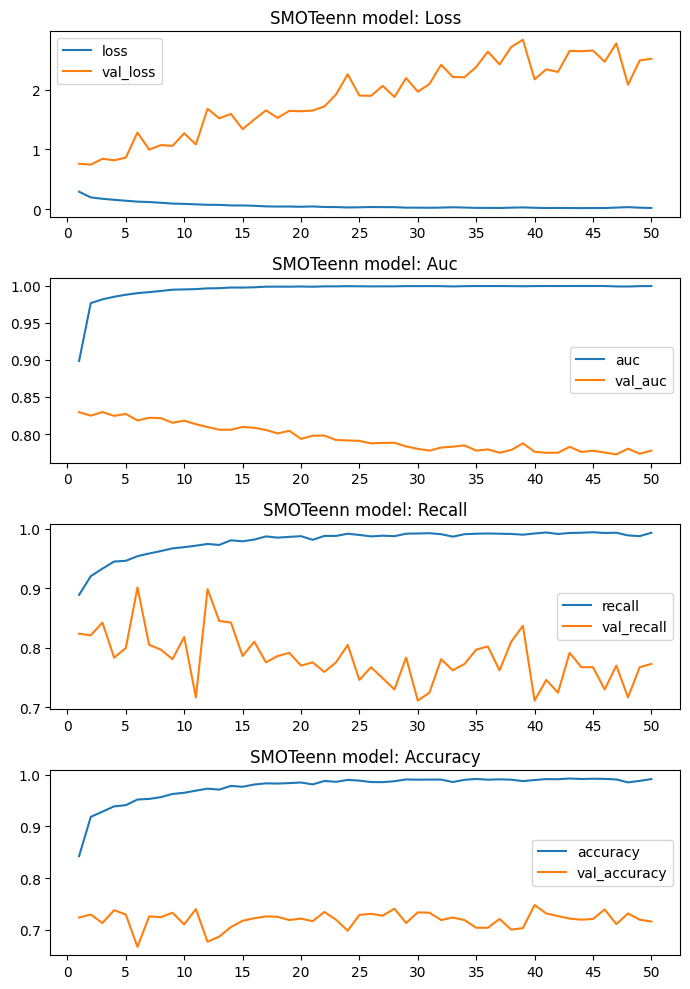

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(7,10))
xticks = range(0, 51, 5)

smoteenn_model_metricks[["loss", "val_loss"]].plot.line(title="SMOTeenn model: Loss", ax = axes[0])
axes[0].set_xticks(xticks)
smoteenn_model_metricks[["auc", "val_auc"]].plot.line(title="SMOTeenn model: Auc", ax = axes[1])
axes[1].set_xticks(xticks)
smoteenn_model_metricks[["recall", "val_recall"]].plot.line(title="SMOTeenn model: Recall", ax = axes[2])
axes[2].set_xticks(xticks)
smoteenn_model_metricks[["accuracy", "val_accuracy"]].plot.line(title="SMOTeenn model: Accuracy", ax = axes[3])
axes[3].set_xticks(xticks)
plt.tight_layout()
plt.show()

In [ ]:
Smoteenn_test = base_model_smoteenn.evaluate(X_val, y_val)

45/45 [==============================] - 0s 3ms/step - loss: 2.1697 - auc: 0.7760 - accuracy: 0.7480 - recall: 0.7112


In [ ]:
izracun_smoteenn = base_model_smoteenn.predict(X_test)
smoteenn_izracun = np.where(izracun_smoteenn > 0.5, 1, 0)

23/23 [==============================] - 0s 2ms/step


In [ ]:
print(f"Metrike:\n{classification_report(y_test, smoteenn_izracun,digits=4)}")
print(f"Matrica konfuzije:\n{confusion_matrix(y_test, smoteenn_izracun)}")

mjerenje_4 = tf.keras.metrics.AUC()
mjerenje_4.update_state(y_test, smoteenn_izracun)
print(f"\nAUC: {((mjerenje_4.result())*100):.2f}%")

Metrike:
              precision    recall  f1-score   support

           0     0.8728    0.7683    0.8172       518
           1     0.5181    0.6898    0.5917       187

    accuracy                         0.7475       705
   macro avg     0.6954    0.7291    0.7045       705
weighted avg     0.7787    0.7475    0.7574       705

Matrica konfuzije:
[[398 120]
 [ 58 129]]

AUC: 72.91%


Može se uočiti blago povećanje funcionalnosti modela ali manje u odnosu na SMOTE Undersampling. Preciznost određivanja klase 1 smanjena je u odnosu na preciznost modela koji za treniranje koristi podatke koji nisu semplirani, dok kod ostalih metrika vidljivo je poboljšanje performansi.

##SMOTETomek

SMOTETomek tehnika sempliranja podataka slična je SMOTEENN tehnici a glavna razlika između njih temeljji se na tome da SMOTETomek prvo izjednači broj primjera iz manjinske i većinske klase, a potom primjenom euklidske udaljenosti računa udaljenost između primjera iz većinske i manjinske klase. 1 primjer iz manjinske klase i 1 primjer iz većinske klase koji imaju udaljenost manju od određene granice uklanjaju se iz skupa.

![picture](https://glemaitre.github.io/imbalanced-learn/_images/sphx_glr_plot_smote_tomek_001.png)

In [ ]:
smtk = SMOTETomek(random_state=42)
X_train_smtk, y_train_smtk = smtk.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

Churn
0    3621
1    1308
Name: count, dtype: int64

In [ ]:
y_train_smtk.value_counts()

Churn
0    3403
1    3403
Name: count, dtype: int64

In [ ]:
Model_History_smotetomek = {}

In [ ]:
smtk_model = konstrukcija_modela( ulaz = X_train_smtk.shape[1])

In [ ]:
smtk_checkpoint = tf.keras.callbacks.ModelCheckpoint('smtk_best_result.h5',
                                                     monitor='val_accuracy',
                                                     verbose=1,
                                                     save_best_only=True,
                                                     mode='max')

In [ ]:
Model_History_smotetomek['Smoteenn_model_r'] = smtk_model.fit(
    X_train_smtk, y_train_smtk, epochs=epochs,
    validation_data = (X_val, y_val),
    callbacks=[smtk_checkpoint]
).history

Epoch 1/50
213/213 [==============================] - ETA: 0s - loss: 0.4606 - auc: 0.8258 - accuracy: 0.7736 - recall: 0.7834
Epoch 1: val_accuracy improved from -inf to 0.76224, saving model to smtk_best_result.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


213/213 [==============================] - 3s 9ms/step - loss: 0.4606 - auc: 0.8258 - accuracy: 0.7736 - recall: 0.7834 - val_loss: 0.4902 - val_auc: 0.8330 - val_accuracy: 0.7622 - val_recall: 0.7032
Epoch 2/50
210/213 [============================>.] - ETA: 0s - loss: 0.4068 - auc: 0.8942 - accuracy: 0.8122 - recall: 0.8291
Epoch 2: val_accuracy improved from 0.76224 to 0.77076, saving model to smtk_best_result.h5
213/213 [==============================] - 1s 5ms/step - loss: 0.4076 - auc: 0.8938 - accuracy: 0.8115 - recall: 0.8287 - val_loss: 0.4492 - val_auc: 0.8301 - val_accuracy: 0.7708 - val_recall: 0.6096
Epoch 3/50
210/213 [============================>.] - ETA: 0s - loss: 0.3886 - auc: 0.9039 - accuracy: 0.8244 - recall: 0.8435
Epoch 3: val_accuracy improved from 0.77076 to 0.77644, saving model to smtk_best_result.h5
213/213 [==============================] - 2s 10ms/step - loss: 0.3882 - auc: 0.9041 - accuracy: 0.8249 - recall: 0.8431 - val_loss: 0.4568 - val_auc: 0.8340 - 

In [ ]:
base_smtk_model = tf.keras.models.load_model('smtk_best_result.h5')

In [ ]:
for model_name, model_history in Model_History_smotetomek.items():
  ime_modela = str(model_name)+"_df"
  locals()[ime_modela] = pd.DataFrame(model_history, index=(range(1,epochs+1)))

In [ ]:
smtk_metrike = Smoteenn_model_r_df
smtk_metrike

loss       auc  accuracy    recall  val_loss   val_auc  val_accuracy  \
1   0.460579  0.825803  0.773585  0.783426  0.490163  0.833017      0.762243   
2   0.407590  0.893832  0.811490  0.828681  0.449230  0.830130      0.770759   
3   0.388188  0.904086  0.824860  0.843080  0.456834  0.834018      0.776437   
4   0.363629  0.917026  0.831031  0.844549  0.540888  0.824921      0.723208   
5   0.349335  0.923740  0.841757  0.853952  0.477199  0.829727      0.770759   
6   0.335725  0.929794  0.851161  0.864237  0.493486  0.820404      0.754436   
7   0.320394  0.936379  0.858066  0.869821  0.516780  0.822707      0.756565   
8   0.311600  0.939931  0.862621  0.870996  0.596728  0.827468      0.721079   
9   0.310040  0.940436  0.869233  0.877167  0.458569  0.829996      0.791341   
10  0.298485  0.945004  0.867764  0.875698  0.580137  0.814464      0.731725   
11  0.296015  0.945996  0.870555  0.875404  0.552458  0.818560      0.743790   
12  0.286108  0.949628  0.875404  0.884220  0.557881  0.823396      0.760114   
13  0.280293  0.951614  0.879224  0.885101  0.522571  0.822623      0.761533   
14  0.272016  0.954527  0.884367  0.891272  0.532577  0.816593      0.755145   
15  0.269023  0.955589  0.885248  0.890979  0.535759  0.814867      0.759404   
16  0.263744  0.957047  0.886277  0.892448  0.544429  0.819955      0.759404   
17  0.257707  0.959159  0.889656  0.898325  0.569743  0.817539      0.745919   
18  0.254422  0.960087  0.890538  0.895680  0.534480  0.814166      0.776437   
19  0.249599  0.961776  0.892742  0.900088  0.542800  0.805664      0.772889   
20  0.246720  0.962565  0.895386  0.901264  0.544763  0.814932      0.770759   
21  0.241965  0.963966  0.897737  0.900382  0.640553  0.812035      0.736693   
22  0.237181  0.965271  0.896709  0.906553  0.545721  0.807947      0.766501   
23  0.233333  0.966542  0.900676  0.904790  0.585937  0.819758      0.762952   
24  0.225025  0.968859  0.903321  0.912724  0.576206  0.806686      0.771469   
25  0.221511  0.969677  0.908757  0.913312  0.634456  0.811287      0.756565   
26  0.223045  0.969301  0.907288  0.917132  0.597871  0.809318      0.763662   
27  0.219073  0.970411  0.906259  0.913312  0.613475  0.805482      0.778566   
28  0.208391  0.973281  0.909932  0.916838  0.604010  0.795095      0.753016   
29  0.210681  0.972432  0.910667  0.919189  0.636463  0.796962      0.770759   
30  0.205947  0.973806  0.912577  0.923597  0.645116  0.806602      0.764372   
31  0.198492  0.975709  0.919336  0.923009  0.606264  0.798383      0.763662   
32  0.197788  0.975563  0.914781  0.923597  0.637505  0.796940      0.770050   
33  0.190299  0.977494  0.919042  0.926242  0.710015  0.791780      0.737402   
34  0.190179  0.977246  0.921540  0.931531  0.661626  0.803067      0.768630   
35  0.185391  0.978663  0.922568  0.928886  0.689046  0.797182      0.774308   
36  0.180929  0.979428  0.923891  0.933882  0.662831  0.787558      0.764372   
37  0.177389  0.980660  0.925801  0.938290  0.729924  0.786233      0.753726   
38  0.172377  0.981232  0.929033  0.940347  0.720105  0.786864      0.750177   
39  0.172668  0.981222  0.926682  0.933294  0.784207  0.794151      0.760823   
40  0.164477  0.982940  0.933441  0.945049  0.749292  0.783072      0.758694   
41  0.160104  0.983829  0.934029  0.942404  0.767287  0.772995      0.747339   
42  0.158890  0.984160  0.934910  0.945636  0.787535  0.776079      0.747339   
43  0.165142  0.982896  0.929621  0.935645  0.795681  0.765960      0.745919   
44  0.159700  0.984300  0.934470  0.943285  0.824680  0.779082      0.753016   
45  0.151984  0.985332  0.939612  0.944461  0.840392  0.790963      0.757984   
46  0.145839  0.986746  0.937702  0.943579  0.902797  0.781915      0.751597   
47  0.141465  0.987342  0.944020  0.947693  0.860991  0.782224      0.755145   
48  0.144057  0.986922  0.939171  0.945342  0.872589  0.775588      0.757984   
49  0.138098  0.987801  0.945636  0.953277  0.943102  0.783822      0.765082   
50  0.14

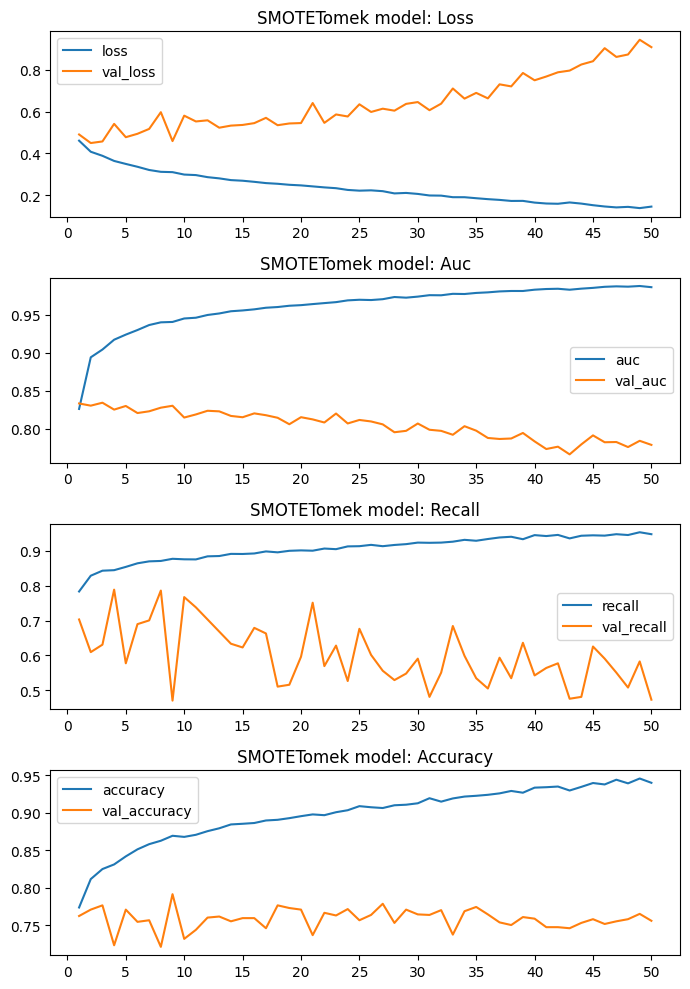

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(7,10))
xticks = range(0, 51, 5)

smtk_metrike[["loss", "val_loss"]].plot.line(title="SMOTETomek model: Loss", ax = axes[0])
axes[0].set_xticks(xticks)
smtk_metrike[["auc", "val_auc"]].plot.line(title="SMOTETomek model: Auc", ax = axes[1])
axes[1].set_xticks(xticks)
smtk_metrike[["recall", "val_recall"]].plot.line(title="SMOTETomek model: Recall", ax = axes[2])
axes[2].set_xticks(xticks)
smtk_metrike[["accuracy", "val_accuracy"]].plot.line(title="SMOTETomek model: Accuracy", ax = axes[3])
axes[3].set_xticks(xticks)
plt.tight_layout()
plt.show()

In [ ]:
smtk_test = base_smtk_model.evaluate(X_val, y_val)

45/45 [==============================] - 0s 3ms/step - loss: 0.4586 - auc: 0.8300 - accuracy: 0.7913 - recall: 0.4706


In [ ]:
smtk_izracun = base_smtk_model.predict(X_test)
smtk_b = np.where(smtk_izracun > 0.5, 1, 0)

23/23 [==============================] - 0s 2ms/step


In [ ]:
print(f"Metrike:\n{classification_report(y_test, smtk_b,digits=4)}")
print(f"Matrica konfuzije:\n{confusion_matrix(y_test, smtk_b)}")

mjerenje_5 = tf.keras.metrics.AUC()
mjerenje_5.update_state(y_test, smtk_b)
print(f"\nAUC: {((mjerenje_5.result())*100):.2f}%")

Metrike:
              precision    recall  f1-score   support

           0     0.8217    0.9073    0.8624       518
           1     0.6391    0.4545    0.5312       187

    accuracy                         0.7872       705
   macro avg     0.7304    0.6809    0.6968       705
weighted avg     0.7732    0.7872    0.7746       705

Matrica konfuzije:
[[470  48]
 [102  85]]

AUC: 68.09%


Iz rezultata metrika vidljivo je da SMOTETomek daje najlošije rezultate.

In [ ]:
print(f"Model bez sempliranja podataka - AUC : \t{((mjerenje_1.result())*100):.2f}%")
print(f"Oversampling model - AUC : \t{((mjerenje_2.result())*100):.2f}%")
print(f"Undersampling model - AUC : \t{((mjerenje_3.result())*100):.2f}%")
print(f"Smoteenn   model - AUC : \t{((mjerenje_4.result())*100):.2f}%")
print(f"Smotetomek model - AUC : \t{((mjerenje_5.result())*100):.2f}%")

Model bez sempliranja podataka - AUC : 	72.63%
Oversampling model - AUC : 	69.71%
Undersampling model - AUC : 	74.77%
Smoteenn   model - AUC : 	72.91%
Smotetomek model - AUC : 	68.09%


Prema ukupnim rezultatima za odabir hiperparametara koristiti će se skup za treniranje koji je nastao kao rezultat primjene SMOTE Undersamplig tehnike sempliranja podataka.

#Analiza Hiperparametara

Za funkcionalnost modela ispituju se sljedeći parametri:
* Optimizator
* Stopa učenja
* Veličina serije
* Broj epoha
* Broj neurona po slojevima
* Aktivacijska funkcija


##Optimizatori

Svrha korištenja optimizatora u modelima dubokog učenja je da podešavaju parametre modela tijekom učenja s ciljem minimizacije funkcije gubitka. Ovi algoritmi olakšavaju proces učenja neuronskih mreža prilagođavanjem parametara mreže kao što su težine i stopa učenja stoga pomaže u smanjenju ukupnog gubitka i poboljšanja točnosti. U ovom ispitivanju analiziraju se 4 tipa optimizatora:
 * Stochastic Gradient Descent (SGD)
 * Rom Mean Square prop (RMS Prop)
 * Adaptive Gradient Descent (Adagrad)
 * Adaptive Moment Estimation (ADAM)

SGD optimizator - varijanta je optimizatora Gradijentnog spusta samo što SGD koristi primjer iz serije (batch) za izračun gradijenta i ažuriranje modela nakon svake iteracije. Početne težine modela se inicijaliziraju slučajno ili pomoću metode, potom se izračuna gradijent funkcije gubitka u odnosu na trenutne parametre modela te se parametri ažuriraju u smjeru suprotnom od gradienta skalirani određenom stopom učenja. Formula za ažuriranje težina:
$$ w = w - \eta \nabla L(w) $$

Adagrad optimizator - koristi različite stope učenja za različite parametre, a koristi to na način da ako su gradijenti koji odgovaraju određenoj komponenti vektora težine veliki, tada će odgovarajuća stopa učenja biti mala, a obratno za manje gradijente. Adagrad akumulira kvadratne gradijente po elementima iz svih prethodnih iteracija te stopu učenja dijeli s korijenom akumuliranih gradijenata. Negativni utjecaj koji ima Adagrad je taj da stopa učenja stalno opada sa povećanjem broja iteracija.
* Formula za izračun akumuliranog kvadratnog gradijenta:
$$ G_{t,i} = G_{t-1,i} + (\nabla L(w_{t,i}))^2 $$
Ažuriranje težine:
$$ w_{t+1,i} = w_{t,i} - \frac{\eta}{\sqrt{G_{t,i}} + \epsilon \nabla L(w_{t,i})} $$

RMS Prop optimizator - građen je kao poboljšanje Adagrad optimiatora te nastoji riješiti njegov problem opadanja stope učenja u završnim iteracijama. Razlika između Adagrad i RMS Prop optimizatora je u tome što umejsto pohranjivanja kumulativnog zbroja kvadrata gradijenta računa se eksponencijalni pomični prosjek za kvadrat gradijenta s ciljem stavljanja naglaska na nedavne vrijednosti gradijenta umjesto ravnomjernog raspoređivanja važnosti.
* Eksponencijalno Pomična Sredina Kvadrata Gradienta:
$$ E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) (\nabla L(w_t))^2 $$

* Ažuriranje Težine:
$$ w_{t+1} = w_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \nabla L(w_t) $$





In [ ]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']

In [ ]:
rezultati = []
for i in optimizers:
  Model_History = {}
  start_time = time.time()
  model = konstrukcija_modela(ulaz = X_train_undersampling.shape[1], optimizer = i)
  model_checkpoint = tf.keras.callbacks.ModelCheckpoint('result.h5',
                                                     monitor='val_accuracy',
                                                     verbose=1,
                                                     save_best_only=True,
                                                     mode='max')
  Model_History['Optimizator'] = model.fit(
    X_train_undersampling, y_train_undersampling, epochs=20,
    validation_data = (X_val, y_val),
    callbacks=[model_checkpoint]
  ).history
  optim_moddel = tf.keras.models.load_model('result.h5')
  end_time = time.time()
  optim_test = optim_moddel.evaluate(X_val, y_val)
  optim_izracun = optim_moddel.predict(X_test)
  optim_round = np.where(optim_izracun > 0.5, 1, 0)

  mjerenje_auc = tf.keras.metrics.AUC()
  mjerenje_acc = tf.keras.metrics.BinaryAccuracy()
  mjerenje_precision = tf.keras.metrics.Precision()
  mjerenje_recall = tf.keras.metrics.Recall()

  mjerenje_auc.update_state(y_test, optim_izracun)
  mjerenje_acc.update_state(y_test, optim_round)
  mjerenje_precision.update_state(y_test, optim_round)
  mjerenje_recall.update_state(y_test, optim_round)

  precision = mjerenje_precision.result().numpy()
  recall = mjerenje_recall.result().numpy()
  f1_score = 2 * (precision * recall) / (precision + recall + 1e-7)

  training_time = end_time - start_time
  rezultat = {
      'Optimizator' : i,
      'Precision': precision,
      'Recall': recall,
      'Accuracy': mjerenje_acc.result().numpy(),
      'F1': f1_score,
      'AUC' : ((mjerenje_auc.result())*100),
      'Vrijeme' : training_time
  }
  rezultati.append(rezultat)

Epoch 1/20
71/82 [========================>.....] - ETA: 0s - loss: 0.6839 - auc: 0.7135 - accuracy: 0.6737 - recall: 0.6276
Epoch 1: val_accuracy improved from -inf to 0.64017, saving model to result.h5
82/82 [==============================] - 2s 17ms/step - loss: 0.6826 - auc: 0.7115 - accuracy: 0.6730 - recall: 0.6350 - val_loss: 0.6751 - val_auc: 0.7033 - val_accuracy: 0.6402 - val_recall: 0.7273
Epoch 2/20
25/82 [========>.....................] - ETA: 0s - loss: 0.6679 - auc: 0.7330 - accuracy: 0.6837 - recall: 0.7525

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


72/82 [=========================>....] - ETA: 0s - loss: 0.6608 - auc: 0.7453 - accuracy: 0.6862 - recall: 0.7565
Epoch 2: val_accuracy improved from 0.64017 to 0.64514, saving model to result.h5
82/82 [==============================] - 1s 7ms/step - loss: 0.6593 - auc: 0.7486 - accuracy: 0.6885 - recall: 0.7630 - val_loss: 0.6585 - val_auc: 0.7588 - val_accuracy: 0.6451 - val_recall: 0.7861
Epoch 3/20
80/82 [============================>.] - ETA: 0s - loss: 0.6314 - auc: 0.7838 - accuracy: 0.7164 - recall: 0.8091
Epoch 3: val_accuracy improved from 0.64514 to 0.65649, saving model to result.h5
82/82 [==============================] - 1s 7ms/step - loss: 0.6306 - auc: 0.7852 - accuracy: 0.7183 - recall: 0.8104 - val_loss: 0.6366 - val_auc: 0.7816 - val_accuracy: 0.6565 - val_recall: 0.8021
Epoch 4/20
82/82 [==============================] - ETA: 0s - loss: 0.5983 - auc: 0.8015 - accuracy: 0.7332 - recall: 0.8096
Epoch 4: val_accuracy improved from 0.65649 to 0.68275, saving model to re

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


76/82 [==========================>...] - ETA: 0s - loss: 0.4848 - auc: 0.8462 - accuracy: 0.7730 - recall: 0.8011
Epoch 2: val_accuracy improved from 0.69056 to 0.78353, saving model to result.h5
82/82 [==============================] - 1s 6ms/step - loss: 0.4871 - auc: 0.8450 - accuracy: 0.7726 - recall: 0.8020 - val_loss: 0.4359 - val_auc: 0.8396 - val_accuracy: 0.7835 - val_recall: 0.6818
Epoch 3/20
80/82 [============================>.] - ETA: 0s - loss: 0.4808 - auc: 0.8491 - accuracy: 0.7703 - recall: 0.7862
Epoch 3: val_accuracy did not improve from 0.78353
82/82 [==============================] - 1s 11ms/step - loss: 0.4791 - auc: 0.8503 - accuracy: 0.7706 - recall: 0.7875 - val_loss: 0.4804 - val_auc: 0.8426 - val_accuracy: 0.7516 - val_recall: 0.7754
Epoch 4/20
75/82 [==========================>...] - ETA: 0s - loss: 0.4691 - auc: 0.8576 - accuracy: 0.7758 - recall: 0.7965
Epoch 4: val_accuracy did not improve from 0.78353
82/82 [==============================] - 1s 11ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


71/82 [========================>.....] - ETA: 0s - loss: 0.6886 - auc: 0.5723 - accuracy: 0.5678 - recall: 0.7705
Epoch 2: val_accuracy improved from 0.42016 to 0.52520, saving model to result.h5
82/82 [==============================] - 1s 7ms/step - loss: 0.6871 - auc: 0.5808 - accuracy: 0.5772 - recall: 0.7706 - val_loss: 0.6949 - val_auc: 0.6249 - val_accuracy: 0.5252 - val_recall: 0.7807
Epoch 3/20
70/82 [========================>.....] - ETA: 0s - loss: 0.6717 - auc: 0.6771 - accuracy: 0.6384 - recall: 0.7769
Epoch 3: val_accuracy improved from 0.52520 to 0.56920, saving model to result.h5
82/82 [==============================] - 1s 7ms/step - loss: 0.6707 - auc: 0.6827 - accuracy: 0.6422 - recall: 0.7852 - val_loss: 0.6785 - val_auc: 0.6977 - val_accuracy: 0.5692 - val_recall: 0.7861
Epoch 4/20
81/82 [============================>.] - ETA: 0s - loss: 0.6554 - auc: 0.7426 - accuracy: 0.6802 - recall: 0.8065
Epoch 4: val_accuracy improved from 0.56920 to 0.61746, saving model to re

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


82/82 [==============================] - 4s 17ms/step - loss: 0.5558 - auc: 0.7991 - accuracy: 0.7347 - recall: 0.7949 - val_loss: 0.4934 - val_auc: 0.8337 - val_accuracy: 0.7537 - val_recall: 0.7807
Epoch 2/20
82/82 [==============================] - ETA: 0s - loss: 0.4869 - auc: 0.8454 - accuracy: 0.7626 - recall: 0.7920
Epoch 2: val_accuracy did not improve from 0.75373
82/82 [==============================] - 1s 6ms/step - loss: 0.4869 - auc: 0.8454 - accuracy: 0.7626 - recall: 0.7920 - val_loss: 0.4922 - val_auc: 0.8383 - val_accuracy: 0.7509 - val_recall: 0.8021
Epoch 3/20
78/82 [===========================>..] - ETA: 0s - loss: 0.4743 - auc: 0.8538 - accuracy: 0.7716 - recall: 0.7827
Epoch 3: val_accuracy improved from 0.75373 to 0.76011, saving model to result.h5
82/82 [==============================] - 1s 7ms/step - loss: 0.4743 - auc: 0.8535 - accuracy: 0.7695 - recall: 0.7760 - val_loss: 0.4822 - val_auc: 0.8436 - val_accuracy: 0.7601 - val_recall: 0.7701
Epoch 4/20
77/82 [=

In [ ]:
for rezultat in rezultati:
    if isinstance(rezultat["AUC"], tf.Tensor):
        rezultat["AUC"] = rezultat["AUC"].numpy()
    elif isinstance(rezultat["AUC"], np.ndarray):
        rezultat["AUC"] = rezultat["AUC"].item()

    if isinstance(rezultat["Accuracy"], tf.Tensor):
        rezultat["Accuracy"] = rezultat["Accuracy"].numpy()
    elif isinstance(rezultat["Accuracy"], np.ndarray):
        rezultat["Accuracy"] = rezultat["Accuracy"].item()

    if isinstance(rezultat["F1"], tf.Tensor):
        rezultat["F1"] = rezultat["F1"].numpy()
    elif isinstance(rezultat["F1"], np.ndarray):
        rezultat["F1"] = rezultat["F1"].item()

rezultati_df = pd.DataFrame(rezultati, index=range(1, len(optimizers)+1))

In [ ]:
optimizator_metrike=rezultati_df
optimizator_metrike

Optimizator  Precision    Recall  Accuracy        F1        AUC    Vrijeme
1         sgd   0.513109  0.732620  0.744681  0.603524  83.406464  15.027945
2     rmsprop   0.583333  0.636364  0.782979  0.608696  84.092453  22.165914
3     adagrad   0.478114  0.759358  0.716312  0.586777  81.769142  21.489659
4        adam   0.549550  0.652406  0.765957  0.596577  81.172958  16.281207

Prema rezultatima za ispitivanje optimizatora na testnoj konstrukciji neuronske mreže može se uočiti da optimizator RMS Prop daje najbolje rezultate ali mu treba više vremena u odnosu na optimizatore SGD i Adam  koji imaju neznantno lošije rezultate ali im je vremenski okvir puno bolji. Optimizator Adagrad je pokazao najlošije rezultate.

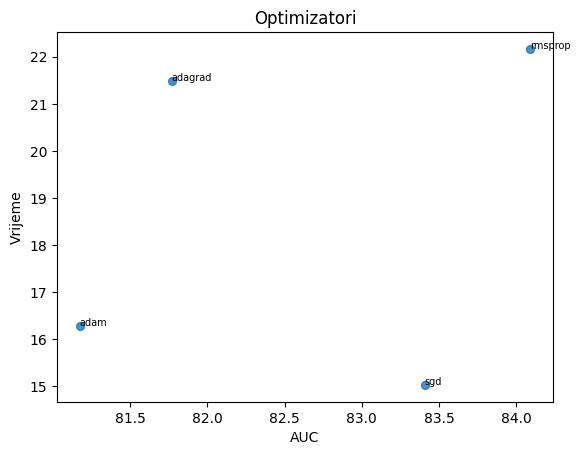

In [ ]:
ax = rezultati_df.plot(kind='scatter', x='AUC', y='Vrijeme', s=32, alpha=.8)
for i, row in rezultati_df.iterrows():
    ax.text(row['AUC'], row['Vrijeme'], row['Optimizator'], fontsize=7, ha='left')

plt.title('Optimizatori')
plt.show()

##Stopa učenja

Stopa učenja je hiperparametar koji se koristi u treniranju neuronske mreže i ima pozitivnu vrijednost u rasponu [0.0 - 1.0]. Kontrolira koliko brzo se model prilagođava problemu. Manja stopa učenja zahtjeva više epoha s obzirom na manje promjene koje se unose u težine pri svakom ažuriranju, dok veća stopa učenja rezultira brzim promjenama i zahtjevaju manji broj epoha.

In [ ]:
optim = [tf.keras.optimizers.Adagrad, tf.keras.optimizers.Adam, tf.keras.optimizers.RMSprop, tf.keras.optimizers.SGD]

In [ ]:
learning_rate_step=[1, 0.1, 0.01, 0.001, 0.0001]

###Step Decay

Step Decay služi za podešavanje stope učenja modela tijekom treniranja, kao parametri koji služe za njegovo podešavanje koriste se 'decay_steps' kojim se određiva nakon koliko koraka se događa smanjivanje stope učenja te se također koristi parametar 'decay_rate' kojim se određiva za koliko se smanjiva stopa učenja.


In [ ]:
koraci_po_epohi = len(X_train_undersampling) // batch_size
ukupni_koraci = epochs * koraci_po_epohi
print("Broj koraka po epohi: ",koraci_po_epohi)
print("Ukupan broj koraka: ",ukupni_koraci)

Broj koraka po epohi:  65
Ukupan broj koraka:  3250


In [ ]:
rezultati=[]
for optimizer in optim:
    for learning_rate in learning_rate_step:
        Model_History = {}
        start_time = time.time()
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=float(learning_rate),
            decay_steps=65,
            decay_rate=0.96,
            staircase=True
        )

        model = konstrukcija_modela(ulaz=X_train_undersampling.shape[1], optimizer=optimizer(learning_rate=lr_schedule))
        history = model.fit(
            X_train_undersampling, y_train_undersampling, epochs=20,
            validation_data=(X_val, y_val)
        )
        end_time = time.time()

        lr_test = model.evaluate(X_val, y_val)
        lr_prediction = model.predict(X_test)
        lr_round = np.where(lr_prediction > 0.5, 1, 0)

        mjerenje_auc = tf.keras.metrics.AUC()
        mjerenje_acc = tf.keras.metrics.BinaryAccuracy()
        mjerenje_precision = tf.keras.metrics.Precision()
        mjerenje_recall = tf.keras.metrics.Recall()

        mjerenje_auc.update_state(y_test, lr_round)
        mjerenje_acc.update_state(y_test, lr_round)
        mjerenje_precision.update_state(y_test, lr_round)
        mjerenje_recall.update_state(y_test, lr_round)

        precision = mjerenje_precision.result().numpy()
        recall = mjerenje_recall.result().numpy()
        f1_score = 2 * (precision * recall) / (precision + recall + 1e-7)
        training_time = end_time - start_time


        rezultat = {
            'Optimizator': optimizer.__name__,
            'Learning_rate': learning_rate,
            'Precision': precision,
            'Recall': recall,
            'Accuracy': mjerenje_acc.result().numpy(),
            'F1': f1_score,
            'AUC': mjerenje_auc.result().numpy(),
            'Vrijeme': training_time
        }

        rezultati.append(rezultat)

Epoch 1/20
82/82 [==============================] - 2s 10ms/step - loss: 0.7437 - auc: 0.6954 - accuracy: 0.6422 - recall: 0.7598 - val_loss: 0.5151 - val_auc: 0.7800 - val_accuracy: 0.7026 - val_recall: 0.8583
Epoch 2/20
82/82 [==============================] - 1s 7ms/step - loss: 0.6900 - auc: 0.5526 - accuracy: 0.5317 - recall: 0.6361 - val_loss: 0.6716 - val_auc: 0.7604 - val_accuracy: 0.4599 - val_recall: 0.9733
Epoch 3/20
82/82 [==============================] - 1s 7ms/step - loss: 0.5592 - auc: 0.7797 - accuracy: 0.7267 - recall: 0.8532 - val_loss: 0.4914 - val_auc: 0.8337 - val_accuracy: 0.7608 - val_recall: 0.7674
Epoch 4/20
82/82 [==============================] - 1s 7ms/step - loss: 0.5230 - auc: 0.8223 - accuracy: 0.7485 - recall: 0.7752 - val_loss: 0.5551 - val_auc: 0.8269 - val_accuracy: 0.7622 - val_recall: 0.7273
Epoch 5/20
82/82 [==============================] - 1s 6ms/step - loss: 0.5013 - auc: 0.8358 - accuracy: 0.7703 - recall: 0.7630 - val_loss: 0.5880 - val_auc: 

In [ ]:
lr_rezultati_step = pd.DataFrame(rezultati, index=range(1, (len(learning_rate_step)*len(optim))+1))

Sljedeći Data Frame prikazuje rezultate mjerenih metrika za kombinacije optimizatora i stope učenja. Podaci su sortirani na osnovu AUC metrike

In [ ]:
lr_rezultati_step.sort_values(by="AUC",ascending=False)

Optimizator  Learning_rate  Precision    Recall  Accuracy        F1  \
3      Adagrad         0.0100   0.523297  0.780749  0.753191  0.626609   
17         SGD         0.1000   0.525735  0.764706  0.754610  0.623094   
2      Adagrad         0.1000   0.517986  0.770053  0.748936  0.619355   
7         Adam         0.1000   0.464387  0.871658  0.699291  0.605948   
12     RMSprop         0.1000   0.514286  0.770053  0.746099  0.616702   
1      Adagrad         1.0000   0.488673  0.807487  0.724823  0.608871   
10        Adam         0.0001   0.516484  0.754011  0.747518  0.613043   
14     RMSprop         0.0010   0.479495  0.812834  0.716312  0.603175   
15     RMSprop         0.0001   0.501754  0.764706  0.736170  0.605932   
8         Adam         0.0100   0.491468  0.770053  0.727660  0.600000   
9         Adam         0.0010   0.493103  0.764706  0.729078  0.599581   
18         SGD         0.0100   0.501792  0.748663  0.736170  0.600858   
13     RMSprop         0.0100   0.515625  0.705882  0.746099  0.595937   
16         SGD         1.0000   0.505703  0.711230  0.739007  0.591111   
4      Adagrad         0.0010   0.443452  0.796791  0.680851  0.569790   
19         SGD         0.0010   0.310036  0.925134  0.434043  0.464430   
5      Adagrad         0.0001   0.366492  0.374332  0.662411  0.370370   
20         SGD         0.0001   0.269044  0.887701  0.330496  0.412935   
11     RMSprop         1.0000   0.000000  0.000000  0.734752  0.000000   
6         Adam         1.0000   0.000000  0.000000  0.734752  0.000000   

         AUC    Vrijeme  
3   0.761996  21.551787  
17  0.757836  14.267543  
2   0.755683  21.335748  
7   0.754362  20.061807  
12  0.753753  21.963513  
1   0.751234  14.968289  
10  0.749592  23.413660  
14  0.747151  14.973973  
15  0.745287  14.478864  
8   0.741204  21.914016  
9   0.740461  21.008372  
18  0.740162  14.691084  
13  0.733250  14.274542  
16  0.730132  14.527538  
4   0.717894  21.357874  
19  0.590945  21.332045  
5   0.570370  21.337589  
20  0.508522  14.649164  
11  0.500000  21.357080  
6   0.500000  21.522499

Može se uočiti da optimizatorima više odgovara kada je stopa učenja u rasponu od 0.1 do 0.001 jer su u tom rasponu stope učenja dali najbolje podatke.

###Exponential Decay

Exponential decay smanjuje stopu učenja kontinuirano tokom treninga, a smanjenje se obavlja eksponencijalno na osnovu broja koraka koji su prošli čime pruža glatko i kontinuirano opadanje stope učenja za razliku od step decay.

In [ ]:
rezultati = []

for optimizer in optim:
  for l in learning_rate_step:
    start_time = time.time()
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=float(l),
        decay_steps=65,
        decay_rate=0.96,
        staircase=False
    )

    model = konstrukcija_modela(ulaz=X_train_undersampling.shape[1], optimizer=optimizer(learning_rate=lr_schedule))
    history= model.fit(
      X_train_undersampling, y_train_undersampling, epochs=20,
      validation_data = (X_val, y_val)
    )
    end_time = time.time()

    lr_test = model.evaluate(X_val, y_val)
    lr_prediction = model.predict(X_test)
    lr_round = np.where(lr_prediction > 0.5, 1, 0)

    mjerenje_auc = tf.keras.metrics.AUC()
    mjerenje_acc = tf.keras.metrics.BinaryAccuracy()
    mjerenje_precision = tf.keras.metrics.Precision()
    mjerenje_recall = tf.keras.metrics.Recall()

    mjerenje_auc.update_state(y_test, lr_round)
    mjerenje_acc.update_state(y_test, lr_round)
    mjerenje_precision.update_state(y_test, lr_round)
    mjerenje_recall.update_state(y_test, lr_round)

    precision = mjerenje_precision.result().numpy()
    recall = mjerenje_recall.result().numpy()
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-7)
    training_time = end_time - start_time


    rezultat = {
      'Optimizator': optimizer.__name__,
      'Learning_rate': l,
      'Precision': precision,
      'Recall': recall,
      'Accuracy': mjerenje_acc.result().numpy(),
      'F1': f1_score,
      'AUC': mjerenje_auc.result().numpy(),
      'Vrijeme': training_time
    }

    rezultati.append(rezultat)

Epoch 1/20
82/82 [==============================] - 2s 10ms/step - loss: 0.7972 - auc: 0.6318 - accuracy: 0.5396 - recall: 0.7426 - val_loss: 0.5145 - val_auc: 0.7673 - val_accuracy: 0.6735 - val_recall: 0.8770
Epoch 2/20
82/82 [==============================] - 1s 6ms/step - loss: 0.5536 - auc: 0.7858 - accuracy: 0.7496 - recall: 0.7898 - val_loss: 0.4603 - val_auc: 0.8322 - val_accuracy: 0.7828 - val_recall: 0.5214
Epoch 3/20
82/82 [==============================] - 1s 6ms/step - loss: 0.5205 - auc: 0.8139 - accuracy: 0.7584 - recall: 0.7424 - val_loss: 0.7114 - val_auc: 0.7953 - val_accuracy: 0.5940 - val_recall: 0.9011
Epoch 4/20
82/82 [==============================] - 0s 6ms/step - loss: 0.5094 - auc: 0.8270 - accuracy: 0.7657 - recall: 0.7569 - val_loss: 0.5678 - val_auc: 0.8270 - val_accuracy: 0.7119 - val_recall: 0.8209
Epoch 5/20
82/82 [==============================] - 1s 6ms/step - loss: 0.4969 - auc: 0.8315 - accuracy: 0.7729 - recall: 0.7783 - val_loss: 0.5039 - val_auc: 

In [ ]:
lr_rezultati_exponential = pd.DataFrame(rezultati, index=range(1, (len(learning_rate_step)*len(optim))+1))

In [ ]:
lr_rezultati_exponential.sort_values(by="AUC",ascending=False)

Optimizator  Learning_rate  Precision    Recall  Accuracy        F1  \
17         SGD         0.1000   0.533582  0.764706  0.760284  0.628571   
3      Adagrad         0.0100   0.527675  0.764706  0.756028  0.624454   
1      Adagrad         1.0000   0.496732  0.812834  0.731915  0.616633   
12     RMSprop         0.1000   0.516014  0.775401  0.747518  0.619658   
7         Adam         0.1000   0.477341  0.844920  0.713475  0.610039   
15     RMSprop         0.0001   0.518248  0.759358  0.748936  0.616052   
9         Adam         0.0010   0.505263  0.770053  0.739007  0.610169   
14     RMSprop         0.0010   0.501730  0.775401  0.736170  0.609244   
13     RMSprop         0.0100   0.500000  0.775401  0.734752  0.607966   
8         Adam         0.0100   0.500000  0.775401  0.734752  0.607966   
2      Adagrad         0.1000   0.507246  0.748663  0.740426  0.604752   
10        Adam         0.0001   0.500000  0.759358  0.734752  0.602972   
4      Adagrad         0.0010   0.466463  0.818182  0.703546  0.594175   
18         SGD         0.0100   0.492958  0.748663  0.729078  0.594480   
16         SGD         1.0000   0.505660  0.716578  0.739007  0.592920   
19         SGD         0.0010   0.427374  0.818182  0.660993  0.561468   
5      Adagrad         0.0001   0.432432  0.684492  0.678014  0.530021   
6         Adam         1.0000   0.000000  0.000000  0.734752  0.000000   
11     RMSprop         1.0000   0.265248  1.000000  0.265248  0.419282   
20         SGD         0.0001   0.000000  0.000000  0.734752  0.000000   

         AUC    Vrijeme  
17  0.761697  13.976693  
3   0.758801  13.692725  
1   0.757769  21.359634  
12  0.756426  14.117575  
7   0.755471  21.525550  
15  0.752266  14.373512  
9   0.748926  14.213578  
14  0.748704  21.368002  
13  0.747739  14.436954  
8   0.747739  14.761522  
2   0.743057  21.722061  
10  0.742613  22.006904  
4   0.740172  21.338006  
18  0.735335  14.276026  
16  0.731841  13.860770  
19  0.711214  21.721267  
5   0.680084  14.551749  
6   0.500000  14.586927  
11  0.500000  21.380209  
20  0.500000  21.344188

Obe Tehnika spuštanja stope učenja pokazale su približno slične rezultate, zajednička stvar koja ime se može uočit je da da za najekstremnije vrijednosti 1.0000 i 0.0001 daju najlošije rezultate.

##Veličina serije

Veličina serije ili *Batch size* predstavlja broj uzoraka koji se unose u model pri svakoj iteraciji. Određuje koliko često se ažuriraju parametri modela na temelju gradijenta funkcije gubitka. Manja veličina serije znači manje podataka za jedno ažuriranje ali i znači da će biti više šuma i varijance u gradijentu. Optimalna veličina serije za model varira ovisno o nekoliko čimbenika kao što su:
* veličina skupa podataka
* složenost modela
* optimizator

Općenito se uzima veličina serije koja je potencija broja 2 = [32,64,128,...]. Veličina serije utječe na optimizaciju na dva načina:
* na brzinu i stabilnost konvergencije (koliko brzo model može ažurirati parametre na temelju gradijenta). Veća stopa učenja smanjuje broj potrebnih izračuna ali zato kao posljedicu donosi količinu vremena koaj je potrebna za računanje tih ažuriranja.
* Stabilnost konvergencije ovisi o tome koliko je gradijent gladak i konzistentan. Manja veličina serije može povećati stabilnost konvergencije izbjegavanjem. lokalnih minimuma i točaka sedlišta, ali također može smanjiti stabilnost konvergencije uvođenjem više šuma i varijance u gradijentu.

Za testiranje veličine serije koristit će se 7 veličina serije koje su višekratnici broja 2 : [8,16,32,64,128,256,1024]

In [ ]:
batch_size_example = [8, 16, 32, 64, 128, 256, 1024]

In [ ]:
rezultati = []

for opt in optim:
  for b in batch_size_example:
    start_time = time.time()
    model = konstrukcija_modela(ulaz=X_train_undersampling.shape[1], optimizer=opt(learning_rate=0.100))
    history = model.fit(X_train_undersampling, y_train_undersampling, epochs=20,
                            validation_data=(X_val, y_val),
                            batch_size=b)

    end_time = time.time()
    batch_test = model.evaluate(X_val, y_val, verbose=0)
    batch_prediction = model.predict(X_test)
    batch_round = np.where(batch_prediction > 0.5, 1, 0)

    mjerenje_auc = tf.keras.metrics.AUC()
    mjerenje_acc = tf.keras.metrics.BinaryAccuracy()
    mjerenje_precision = tf.keras.metrics.Precision()
    mjerenje_recall = tf.keras.metrics.Recall()

    mjerenje_auc.update_state(y_test, batch_round)
    mjerenje_acc.update_state(y_test, batch_round)
    mjerenje_precision.update_state(y_test, batch_round)
    mjerenje_recall.update_state(y_test, batch_round)

    precision = mjerenje_precision.result().numpy()
    recall = mjerenje_recall.result().numpy()
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-7)
    accuracy = mjerenje_acc.result().numpy()
    auc = mjerenje_auc.result().numpy()

    training_time = end_time - start_time
    rezultat = {
        'Optimizator': opt.__name__,
        'batch_size': b,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1': f1_score,
        'AUC': auc,
        'Vrijeme': training_time
      }

    rezultati.append(rezultat)

Epoch 1/20
327/327 [==============================] - 3s 7ms/step - loss: 0.5230 - auc: 0.7647 - accuracy: 0.7416 - recall: 0.6011 - val_loss: 0.5725 - val_auc: 0.8369 - val_accuracy: 0.7182 - val_recall: 0.8342
Epoch 2/20
327/327 [==============================] - 2s 6ms/step - loss: 0.4884 - auc: 0.8458 - accuracy: 0.7741 - recall: 0.7913 - val_loss: 0.5392 - val_auc: 0.8392 - val_accuracy: 0.7026 - val_recall: 0.8610
Epoch 3/20
327/327 [==============================] - 2s 5ms/step - loss: 0.4803 - auc: 0.8495 - accuracy: 0.7760 - recall: 0.7898 - val_loss: 0.5679 - val_auc: 0.8438 - val_accuracy: 0.7090 - val_recall: 0.8636
Epoch 4/20
327/327 [==============================] - 3s 8ms/step - loss: 0.4754 - auc: 0.8526 - accuracy: 0.7771 - recall: 0.7867 - val_loss: 0.5389 - val_auc: 0.8402 - val_accuracy: 0.7402 - val_recall: 0.7888
Epoch 5/20
327/327 [==============================] - 2s 7ms/step - loss: 0.4681 - auc: 0.8584 - accuracy: 0.7810 - recall: 0.7898 - val_loss: 0.4918 - 

In [ ]:
batchSize_rezultati = pd.DataFrame(rezultati, index=range(1, (len(batch_size_example)*len(optimizers))+1))

In [ ]:
batchSize_rezultati.sort_values(by="AUC", ascending=False)

Optimizator  batch_size  Precision    Recall  Accuracy        F1       AUC  \
24         SGD          32   0.552529  0.759358  0.773050  0.639640  0.768675   
6      Adagrad         256   0.528777  0.786096  0.757447  0.632258  0.766600   
11        Adam          64   0.506667  0.812834  0.740426  0.624230  0.763560   
4      Adagrad          64   0.538760  0.743316  0.763121  0.624719  0.756793   
27         SGD         256   0.503378  0.796791  0.737589  0.616977  0.756504   
14        Adam        1024   0.548781  0.721925  0.768794  0.623557  0.753820   
19     RMSprop         128   0.548781  0.721925  0.768794  0.623557  0.753820   
9         Adam          16   0.518248  0.759358  0.748936  0.616052  0.752266   
12        Adam         128   0.539683  0.727273  0.763121  0.619590  0.751667   
5      Adagrad         128   0.500000  0.786096  0.734752  0.611227  0.751156   
13        Adam         256   0.559829  0.700535  0.774468  0.622328  0.750847   
25         SGD          64   0.505226  0.775401  0.739007  0.611814  0.750635   
22         SGD           8   0.498305  0.786096  0.733333  0.609958  0.750191   
17     RMSprop          32   0.507042  0.770053  0.740426  0.611465  0.749892   
26         SGD         128   0.531008  0.732620  0.757447  0.615730  0.749515   
28         SGD        1024   0.498294  0.780749  0.733333  0.608333  0.748482   
15     RMSprop           8   0.482428  0.807487  0.719149  0.604000  0.747373   
16     RMSprop          16   0.533597  0.721925  0.758865  0.613636  0.747063   
23         SGD          16   0.494915  0.780749  0.730496  0.605809  0.746552   
1      Adagrad           8   0.482315  0.802139  0.719149  0.602410  0.745664   
10        Adam          32   0.469697  0.828877  0.706383  0.599613  0.745520   
20     RMSprop         256   0.473684  0.818182  0.710638  0.600000  0.744998   
3      Adagrad          32   0.525097  0.727273  0.753191  0.609865  0.744911   
7      Adagrad        1024   0.486755  0.786096  0.723404  0.601227  0.743434   
18     RMSprop          64   0.568182  0.668449  0.777305  0.614251  0.742526   
2      Adagrad          16   0.466463  0.818182  0.703546  0.594175  0.740172   
21     RMSprop        1024   0.440771  0.855615  0.673759  0.581818  0.731862   
8         Adam           8   0.000000  0.000000  0.734752  0.000000  0.500000   

      Vrijeme  
24  21.343618  
6    3.610268  
11  11.273679  
4    8.131501  
27   6.382507  
14   3.377512  
19   5.468139  
9   25.339932  
12   6.168546  
5    5.240161  
13   6.165378  
25   8.765451  
22  82.696694  
17  14.422117  
26   5.592523  
28   3.403076  
15  43.980149  
16  41.829896  
23  27.035737  
1   41.414719  
10  21.473001  
20   4.710332  
3   13.490094  
7    3.511112  
18  10.258387  
2   41.844663  
21   3.897301  
8   41.764600

Može se uočiti da modeli koji su koristili veće serije veličine ostvarili su bolje rezultate.

##Epochs

Epoha se odnosi na jedan potpuni prolaz cjelokupnog skupa podataka za učenje kroz model. Izravno je povezana s tim koliko model uči i generalizira tražene podatke. Ako je veličina epohe premala model možda neće imati dovoljno vremena za učenje, suprotno tome ako je broj epoha prevelik model se može previše prilagoditi i dovesti do prenaučenosti što dovodi do negativnog utjecaja jer se model previše prilagodi jednim podacima te na novom skupu podataka neće ostvariti dobre rezultate. Za testiranje neuronske mreže koristit će se sljedeće vrijednosti epoha:
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [ ]:
epochs_number = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [ ]:
rezultati = []

for op in optim:
  for e in epochs_number:
    start_time = time.time()
    model = konstrukcija_modela(ulaz=X_train_undersampling.shape[1], optimizer=op(learning_rate=0.100))
    history = model.fit(X_train_undersampling, y_train_undersampling, epochs=e,
                            validation_data=(X_val, y_val),
                            batch_size=b)

    end_time = time.time()
    batch_test = model.evaluate(X_val, y_val, verbose=0)
    batch_prediction = model.predict(X_test)
    batch_round = np.where(batch_prediction > 0.5, 1, 0)

    mjerenje_auc = tf.keras.metrics.AUC()
    mjerenje_acc = tf.keras.metrics.BinaryAccuracy()
    mjerenje_precision = tf.keras.metrics.Precision()
    mjerenje_recall = tf.keras.metrics.Recall()

    mjerenje_auc.update_state(y_test, batch_round)
    mjerenje_acc.update_state(y_test, batch_round)
    mjerenje_precision.update_state(y_test, batch_round)
    mjerenje_recall.update_state(y_test, batch_round)

    precision = mjerenje_precision.result().numpy()
    recall = mjerenje_recall.result().numpy()
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-7)
    accuracy = mjerenje_acc.result().numpy()
    auc = mjerenje_auc.result().numpy()

    training_time = end_time - start_time
    rezultat = {
        'Optimizator': op.__name__,
        'Epochs': e,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1': f1_score,
        'AUC': auc,
        'Vrijeme': training_time
      }

    rezultati.append(rezultat)

Epoch 1/10
3/3 [==============================] - 2s 265ms/step - loss: 0.7101 - auc: 0.6227 - accuracy: 0.5970 - recall: 0.2693 - val_loss: 0.6623 - val_auc: 0.7590 - val_accuracy: 0.6728 - val_recall: 0.7353
Epoch 2/10
3/3 [==============================] - 0s 37ms/step - loss: 0.6481 - auc: 0.7854 - accuracy: 0.7263 - recall: 0.7783 - val_loss: 0.6108 - val_auc: 0.8036 - val_accuracy: 0.7331 - val_recall: 0.7460
Epoch 3/10
3/3 [==============================] - 0s 36ms/step - loss: 0.6012 - auc: 0.8142 - accuracy: 0.7523 - recall: 0.7714 - val_loss: 0.5845 - val_auc: 0.8137 - val_accuracy: 0.7126 - val_recall: 0.8128
Epoch 4/10
3/3 [==============================] - 0s 37ms/step - loss: 0.5534 - auc: 0.8273 - accuracy: 0.7550 - recall: 0.7936 - val_loss: 0.5678 - val_auc: 0.8189 - val_accuracy: 0.7111 - val_recall: 0.8316
Epoch 5/10
3/3 [==============================] - 0s 38ms/step - loss: 0.5207 - auc: 0.8317 - accuracy: 0.7550 - recall: 0.8043 - val_loss: 0.5006 - val_auc: 0.820

In [ ]:
epochs_rezultati = pd.DataFrame(rezultati, index=range(1, (len(epochs_number)*len(optimizers))+1))

In [ ]:
epochs_rezultati.sort_values(by="AUC", ascending=False)

Optimizator  Epochs  Precision    Recall  Accuracy        F1       AUC  \
16        Adam      60   0.520979  0.796791  0.751773  0.630021  0.766156   
30     RMSprop     100   0.546875  0.748663  0.768794  0.632054  0.762362   
9      Adagrad      90   0.578261  0.711230  0.785816  0.637890  0.761986   
38         SGD      80   0.506711  0.807487  0.740426  0.622680  0.761851   
5      Adagrad      50   0.519573  0.780749  0.750355  0.623932  0.760065   
28     RMSprop      80   0.594470  0.689840  0.792908  0.638614  0.759978   
8      Adagrad      80   0.565401  0.716578  0.778723  0.632075  0.758868   
12        Adam      20   0.516014  0.775401  0.747518  0.619658  0.756426   
26     RMSprop      60   0.577778  0.695187  0.784397  0.631068  0.755895   
24     RMSprop      40   0.501695  0.791444  0.736170  0.614108  0.753830   
10     Adagrad     100   0.528302  0.748663  0.756028  0.619469  0.753675   
19        Adam      90   0.484277  0.823529  0.720567  0.609901  0.753464   
4      Adagrad      40   0.474320  0.839572  0.710638  0.606178  0.751832   
39         SGD      90   0.537549  0.727273  0.761702  0.618182  0.750702   
11        Adam      10   0.565789  0.689840  0.777305  0.621687  0.749360   
40         SGD     100   0.522556  0.743316  0.751773  0.613686  0.749071   
23     RMSprop      30   0.460000  0.860963  0.695035  0.599628  0.748049   
27     RMSprop      70   0.538153  0.716578  0.761702  0.614679  0.747285   
37         SGD      70   0.505300  0.764706  0.739007  0.608511  0.747218   
32         SGD      20   0.505300  0.764706  0.739007  0.608511  0.747218   
2      Adagrad      20   0.458689  0.860963  0.693617  0.598513  0.747084   
36         SGD      60   0.498282  0.775401  0.733333  0.606695  0.746774   
6      Adagrad      60   0.498282  0.775401  0.733333  0.606695  0.746774   
29     RMSprop      90   0.536000  0.716578  0.760284  0.613272  0.746320   
14        Adam      40   0.527132  0.727273  0.754610  0.611236  0.745876   
3      Adagrad      30   0.556522  0.684492  0.771631  0.613909  0.743790   
20        Adam     100   0.536585  0.705882  0.760284  0.609700  0.742903   
17        Adam      70   0.527559  0.716578  0.754610  0.607710  0.742459   
7      Adagrad      70   0.444444  0.877005  0.676596  0.589928  0.740626   
35         SGD      50   0.503650  0.737968  0.737589  0.598698  0.737710   
33         SGD      30   0.500000  0.743316  0.734752  0.597849  0.737488   
13        Adam      30   0.507463  0.727273  0.740426  0.597802  0.736223   
34         SGD      40   0.501845  0.727273  0.736170  0.593886  0.733328   
31         SGD      10   0.455090  0.812834  0.692199  0.583493  0.730741   
1      Adagrad      10   0.576355  0.625668  0.778723  0.600000  0.729823   
22     RMSprop      20   0.455385  0.791444  0.693617  0.578125  0.724872   
21     RMSprop      10   0.366397  0.967914  0.547518  0.531571  0.681834   
18        Adam      80   0.318739  0.973262  0.441135  0.480211  0.611148   
15        Adam      50   0.317627  0.973262  0.438298  0.478947  0.609218   
25     RMSprop      50   0.764706  0.208556  0.773050  0.327731  0.592695   

      Vrijeme  
16   8.071026  
30  11.849252  
9   10.293782  
38  11.220620  
5    4.871392  
28  11.266986  
8    8.986231  
12   3.518991  
26  11.540343  
24  11.232546  
10  12.146993  
19  11.249283  
4    5.274850  
39  11.659845  
11   2.892100  
40  12.641237  
23   4.140636  
27   9.468246  
37  10.190938  
32   4.600385  
2    2.926985  
36   7.455072  
6    6.394276  
29  11.123508  
14   5.861142  
3    5.961807  
20  11.718107  
17   9.965328  
7   11.366462  
35   8.272610  
33   4.359369  
13   4.736737  
34  11.502925  
31   3.907568  
1    3.419453  
22   3.255883  
21   3.315111  
18  11.251932  
15   6.086162  
25   6.475483

Na osnovu dobivenih rezultata metrika može se uočiti da konstrukciji modela više odgovara veći broj epoha, [60, 80, 90, 100] , međutim treba biti oprezan kod zbog toga što to može dovesti do pretreniranosti modela.

## Neurons

Broj neurona prema slojevima korišten u testiranju odabran je prema sljedećim pravilima:
* Broj skrivenih neurona trebao bi biti između veličine ulaznog sloja i veličine izlaznog sloja. [ 1 - 40 ]
* Broj skrivenih neurona trebao bi biti 2/3 veličine ulaznog sloja, plus veličina izlaznog sloja. [ 1 - 27 ]
* Broj skrivenih neurona trebao bi biti manji od dvostruko veće veličine ulaznog sloja. [ 1 - 80 ]

In [ ]:
neuroni_broj = [(40,30,20), (30,20,10),(35,25,15), (27,17,7), (25,15,5), (22,16,8), (80,40,20), (65,45,25), (75,35,15)]

In [ ]:
rezultati = []

for opt in optim:
  for prvi, drugi, treci in neuroni_broj:
    start_time = time.time()
    model = konstrukcija_modela(ulaz=X_train_undersampling.shape[1], sloj_1=prvi, sloj_2=drugi, sloj_3=treci, optimizer=opt(learning_rate=0.1))
    history=model.fit(X_train_undersampling, y_train_undersampling, epochs=20,
      validation_data = (X_val, y_val)
    )
    end_time = time.time()
    batch_test = model.evaluate(X_val, y_val, verbose=0)
    batch_prediction = model.predict(X_test)
    batch_round = np.where(batch_prediction > 0.5, 1, 0)

    mjerenje_auc = tf.keras.metrics.AUC()
    mjerenje_acc = tf.keras.metrics.BinaryAccuracy()
    mjerenje_precision = tf.keras.metrics.Precision()
    mjerenje_recall = tf.keras.metrics.Recall()

    mjerenje_auc.update_state(y_test, batch_round)
    mjerenje_acc.update_state(y_test, batch_round)
    mjerenje_precision.update_state(y_test, batch_round)
    mjerenje_recall.update_state(y_test, batch_round)

    precision = mjerenje_precision.result().numpy()
    recall = mjerenje_recall.result().numpy()
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-7)
    accuracy = mjerenje_acc.result().numpy()
    auc = mjerenje_auc.result().numpy()

    training_time = end_time - start_time
    rezultat = {
        'Optimizator': opt.__name__,
        'Neuroni': f"({prvi},{drugi},{treci})",
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1': f1_score,
        'AUC': auc,
        'Vrijeme': training_time
      }

    rezultati.append(rezultat)

Epoch 1/20
82/82 [==============================] - 4s 18ms/step - loss: 0.5355 - auc: 0.8187 - accuracy: 0.7434 - recall: 0.7646 - val_loss: 0.4909 - val_auc: 0.8353 - val_accuracy: 0.7495 - val_recall: 0.8021
Epoch 2/20
82/82 [==============================] - 1s 10ms/step - loss: 0.4905 - auc: 0.8430 - accuracy: 0.7706 - recall: 0.7966 - val_loss: 0.5588 - val_auc: 0.8346 - val_accuracy: 0.6977 - val_recall: 0.8636
Epoch 3/20
82/82 [==============================] - 1s 10ms/step - loss: 0.4843 - auc: 0.8460 - accuracy: 0.7611 - recall: 0.7852 - val_loss: 0.5317 - val_auc: 0.8412 - val_accuracy: 0.7310 - val_recall: 0.8262
Epoch 4/20
82/82 [==============================] - 1s 12ms/step - loss: 0.4754 - auc: 0.8526 - accuracy: 0.7722 - recall: 0.7951 - val_loss: 0.4795 - val_auc: 0.8394 - val_accuracy: 0.7651 - val_recall: 0.7701
Epoch 5/20
82/82 [==============================] - 1s 11ms/step - loss: 0.4682 - auc: 0.8578 - accuracy: 0.7821 - recall: 0.7920 - val_loss: 0.5098 - val_a

In [ ]:
neurons_rezultati = pd.DataFrame(rezultati, index=range(1, (len(neuroni_broj)*len(optim))+1))

In [ ]:
neurons_rezultati.sort_values(by="AUC", ascending=False)

Optimizator     Neuroni  Precision    Recall  Accuracy        F1       AUC  \
32         SGD   (25,15,5)   0.522491  0.807487  0.753191  0.634454  0.770539   
30         SGD  (35,25,15)   0.522807  0.796791  0.753191  0.631356  0.767122   
31         SGD   (27,17,7)   0.533088  0.775401  0.760284  0.631808  0.765114   
29         SGD  (30,20,10)   0.523132  0.786096  0.753191  0.628205  0.763705   
2      Adagrad  (30,20,10)   0.575107  0.716578  0.784397  0.638095  0.762729   
3      Adagrad  (35,25,15)   0.490625  0.839572  0.726241  0.619329  0.762450   
17        Adam  (65,45,25)   0.496753  0.818182  0.731915  0.618182  0.759477   
28         SGD  (40,30,20)   0.527881  0.759358  0.756028  0.622807  0.757092   
11        Adam  (30,20,10)   0.528090  0.754011  0.756028  0.621145  0.755384   
5      Adagrad   (25,15,5)   0.526119  0.754011  0.754610  0.619780  0.754418   
24     RMSprop   (22,16,8)   0.459610  0.882353  0.693617  0.604396  0.753918   
25     RMSprop  (80,40,20)   0.495050  0.802139  0.730496  0.612245  0.753386   
19     RMSprop  (40,30,20)   0.481366  0.828877  0.717731  0.609037  0.753242   
1      Adagrad  (40,30,20)   0.551867  0.711230  0.770213  0.621495  0.751368   
4      Adagrad   (27,17,7)   0.516364  0.759358  0.747518  0.614719  0.751301   
13        Adam   (27,17,7)   0.459155  0.871658  0.693617  0.601476  0.750501   
7      Adagrad  (80,40,20)   0.552301  0.705882  0.770213  0.619718  0.749659   
6      Adagrad   (22,16,8)   0.524904  0.732620  0.753191  0.611607  0.746619   
33         SGD   (22,16,8)   0.455056  0.866310  0.689362  0.596685  0.745896   
34         SGD  (80,40,20)   0.490000  0.786096  0.726241  0.603696  0.745365   
8      Adagrad  (65,45,25)   0.558952  0.684492  0.773050  0.615385  0.744756   
21     RMSprop  (35,25,15)   0.447154  0.882353  0.679433  0.593525  0.744265   
23     RMSprop   (25,15,5)   0.538776  0.705882  0.761702  0.611111  0.743868   
36         SGD  (75,35,15)   0.597015  0.641711  0.790071  0.618557  0.742670   
18        Adam  (75,35,15)   0.548936  0.689840  0.767376  0.611374  0.742603   
26     RMSprop  (65,45,25)   0.612565  0.625668  0.795745  0.619048  0.741406   
9      Adagrad  (75,35,15)   0.477564  0.796791  0.714894  0.597194  0.741060   
35         SGD  (65,45,25)   0.483444  0.780749  0.720567  0.597137  0.739795   
20     RMSprop  (30,20,10)   0.440860  0.877005  0.672340  0.586762  0.737731   
16        Adam  (80,40,20)   0.430446  0.877005  0.659574  0.577465  0.729043   
15        Adam   (22,16,8)   0.647799  0.550802  0.801418  0.595376  0.721347   
12        Adam  (35,25,15)   0.382046  0.978610  0.574468  0.549550  0.703591   
10        Adam  (40,30,20)   0.369478  0.983957  0.550355  0.537226  0.688890   
14        Adam   (25,15,5)   0.000000  0.000000  0.734752  0.000000  0.500000   
27     RMSprop  (75,35,15)   0.265248  1.000000  0.265248  0.419282  0.500000   
22     RMSprop   (27,17,7)   0.000000  0.000000  0.734752  0.000000  0.500000   

      Vrijeme  
32  16.881397  
30  15.254476  
31  15.337619  
29  21.367018  
2   13.591661  
3   21.342153  
17  17.163502  
28  15.546678  
11  14.328673  
5   13.816799  
24  15.893122  
25  15.451113  
19  15.358971  
1   21.789085  
4   21.468987  
13  21.704109  
7   21.323801  
6   21.317052  
33  15.777950  
34  15.459934  
8   21.326655  
21  15.248915  
23  21.584008  
36  21.303923  
18  21.606699  
26  21.364992  
9   14.003703  
35  21.814474  
20  21.422422  
16  21.504522  
15  15.288757  
12  15.574401  
10  21.496798  
14  14.969416  
27  15.527963  
22  15.082667

Iz rezultata metrika može se vidjeti da modelu ne odgovara veliki broj neurona po slojevima stoga će se u ispitivanju kombinacija hiperparametara na to obratiti pozornost tako da se u dostupne parametre postave optimalni broj neurona po slojevima.

##Aktivacijske funkcije

Aktivacijske funkcijetransformiraju ulazni signal čvora u neuronskoj mreži u izlazni signal koji se zatim prosljeđuje na sljedeći sloj. Bez aktivacijskih funkcija, neuronske mreže bile bi ograničene na modeliranje samo linearnih odnosa između ulaza i izlaza. Uvode nelinearnosti, omogućujući neuronskim mrežama da nauče vrlo složena mapiranja između ulaza i izlaza. Odabir prave funkcije aktivacije ključan je za treniranje neuronskih mreža koje dobro generaliziraju i daju točna predviđanja. Bez aktivacijskih funkcija, neuronske mreže bi se sastojale samo od linearnih operacija poput množenja matrice. Svi bi slojevi izvodili linearne transformacije ulaza i ne bi bile uvedene nelinearnosti, a većina podataka iz stvarnog svijeta je nelinearna.

###Aktivacijske funkcije za skrivene slojeve:
* Rectified Linear Activation (ReLU)
* Logistic (Sigmoid)
* Hyperbolic Tangent (Tanh)

###ReLU
Izlaz ReLU funkcije je  0 za negativne vrijednosti, a sam unos za pozitivne vrijednosti. Za ulaze veće od 0, ReLU djeluje kao linearna funkcija s gradijentom od 1, to znači da ne mijenja skalu pozitivnih ulaza. Ovo je svojstvo ključno za ublažavanje problema nestajanja gradijenta. Iako je ReLU linearan za polovicu svog ulaznog prostora, tehnički je ne linearna funkcija jer ima ne diferencijabilnu točku na x=0, gdje se naglo mijenja od x. Ova ne linearnost omogućuje neuronskim mrežama učenje složenih uzoraka. Budući da ReLU daje nulu za sve negativne ulaze, to prirodno dovodi do rijetkih aktivacija, u bilo kojem trenutku aktivira se samo podskup neurona, što dovodi do učinkovitijeg računanja.

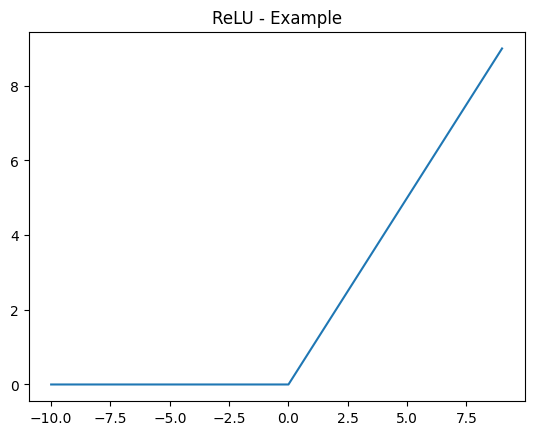

In [ ]:
def relu_primjer(x):
 return max(0.0, x)

inputs = [x for x in range(-10, 10)]
outputs = [relu_primjer(x) for x in inputs]
pyplot.plot(inputs, outputs)
pyplot.title("ReLU - Example")
pyplot.show()

###Sigmoid
Sigmoidna aktivacijska funkcija, često predstavljena kao σ(x), glatka je, kontinuirano diferencijabilna funkcija. Uzima ulazni podatak stvarne vrijednosti i zgnječi ga na vrijednost između 0 i 1. Sigmoidna funkcija ima krivulju u obliku slova "S" koja asimptota iznosi 0 za velike negativne brojeve i 1 za velike pozitivne brojeve. Izlazi se lako mogu interpretirati kao vjerojatnosti, što ga čini prirodnim za probleme binarne klasifikacije. Glavni slučaj upotrebe sigmoidne funkcije je aktivacija za izlazni sloj modela binarne klasifikacije. On sabija izlaz na vrijednost vjerojatnosti između 0 i 1, što se može protumačiti kao vjerojatnost da ulaz pripada određenoj klasi.

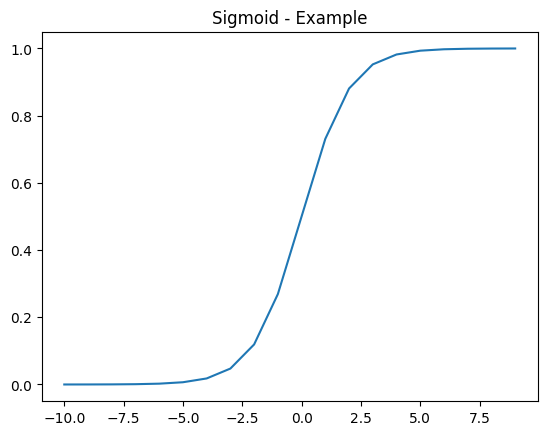

In [ ]:
def sigmoid_primjer(x):
 return 1.0 / (1.0 + exp(-x))

inputs = [x for x in range(-10, 10)]
outputs = [sigmoid_primjer(x) for x in inputs]
pyplot.plot(inputs, outputs)
pyplot.title("Sigmoid - Example")
pyplot.show()

#Tanh
Funkcija tanh daje vrijednosti u rasponu od -1 do +1. To znači da se može nositi s negativnim vrijednostima učinkovitije od sigmoidne funkcije, koja ima raspon od 0 do 1. Za razliku od sigmoidne funkcije, tanh je u središtu nule, što znači da je njen izlaz simetričan oko ishodišta koordinatnog sustava. To se često smatra prednošću jer može pomoći da algoritam učenja brže konvergira. Budući da se izlaz tanh kreće između -1 i +1, ima jače gradijente od sigmoidne funkcije. Jači gradijenti često rezultiraju bržim učenjem i konvergencijom tijekom treninga jer imaju tendenciju da budu otporniji na problem nestajanja gradijenata u usporedbi s gradijentima sigmoidne funkcije.

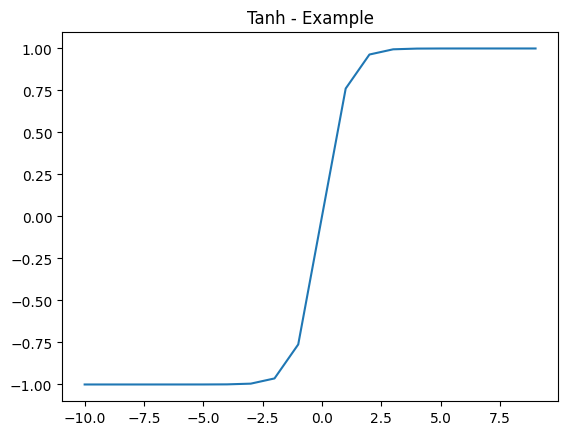

In [ ]:
def tanh_primjer(x):
 return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

inputs = [x for x in range(-10, 10)]
outputs = [tanh_primjer(x) for x in inputs]
pyplot.plot(inputs, outputs)
pyplot.title("Tanh - Example")
pyplot.show()

###Aktivacijske funkcije za izlazni sloj:
* Sigmoid
* Tanh

In [ ]:
hidden_layers = ['relu','sigmoid','tanh']
output_layers = ['sigmoid','tanh']

In [ ]:
rezultati = []

for hidden in hidden_layers:
  for out in output_layers:
    start_time = time.time()

    model = konstrukcija_modela(ulaz=X_train_undersampling.shape[1], akt_funkcija_1 = hidden, akt_funkcija_2 = out)
    history=model.fit(X_train_undersampling, y_train_undersampling, epochs=20,
      validation_data = (X_val, y_val)
    )

    end_time = time.time()
    batch_test = model.evaluate(X_val, y_val, verbose=0)
    batch_prediction = model.predict(X_test)
    batch_round = np.where(batch_prediction > 0.5, 1, 0)

    mjerenje_auc = tf.keras.metrics.AUC()
    mjerenje_acc = tf.keras.metrics.BinaryAccuracy()
    mjerenje_precision = tf.keras.metrics.Precision()
    mjerenje_recall = tf.keras.metrics.Recall()

    mjerenje_auc.update_state(y_test, batch_round)
    mjerenje_acc.update_state(y_test, batch_round)
    mjerenje_precision.update_state(y_test, batch_round)
    mjerenje_recall.update_state(y_test, batch_round)

    precision = mjerenje_precision.result().numpy()
    recall = mjerenje_recall.result().numpy()
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-7)
    accuracy = mjerenje_acc.result().numpy()
    auc = mjerenje_auc.result().numpy()

    training_time = end_time - start_time
    rezultat = {
        'Akt_funkcija_1': hidden,
        'Akt_funkcija_2': out,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1': f1_score,
        'AUC': auc,
        'Vrijeme': training_time
      }

    rezultati.append(rezultat)

Epoch 1/20
82/82 [==============================] - 2s 10ms/step - loss: 0.5455 - auc: 0.8203 - accuracy: 0.7520 - recall: 0.7497 - val_loss: 0.6216 - val_auc: 0.8335 - val_accuracy: 0.6955 - val_recall: 0.8529
Epoch 2/20
82/82 [==============================] - 1s 6ms/step - loss: 0.4866 - auc: 0.8455 - accuracy: 0.7676 - recall: 0.7859 - val_loss: 0.5779 - val_auc: 0.8368 - val_accuracy: 0.7040 - val_recall: 0.8610
Epoch 3/20
82/82 [==============================] - 1s 6ms/step - loss: 0.4742 - auc: 0.8538 - accuracy: 0.7687 - recall: 0.7875 - val_loss: 0.5420 - val_auc: 0.8399 - val_accuracy: 0.7260 - val_recall: 0.8289
Epoch 4/20
82/82 [==============================] - 1s 7ms/step - loss: 0.4738 - auc: 0.8544 - accuracy: 0.7718 - recall: 0.7875 - val_loss: 0.5487 - val_auc: 0.8406 - val_accuracy: 0.7154 - val_recall: 0.8369
Epoch 5/20
82/82 [==============================] - 1s 7ms/step - loss: 0.4610 - auc: 0.8626 - accuracy: 0.7840 - recall: 0.8112 - val_loss: 0.5012 - val_auc: 

In [ ]:
functions_rez = pd.DataFrame(rezultati, index=range(1, len(hidden_layers)*len(output_layers)+1))

In [ ]:
functions_rez.sort_values(by="AUC", ascending=False)

Akt_funkcija_1 Akt_funkcija_2  Precision    Recall  Accuracy        F1  \
5           tanh        sigmoid   0.538462  0.786096  0.764539  0.639130   
3        sigmoid        sigmoid   0.525362  0.775401  0.754610  0.626350   
2           relu           tanh   0.538462  0.711230  0.761702  0.612903   
1           relu        sigmoid   0.500000  0.764706  0.734752  0.604651   
4        sigmoid           tanh   0.507246  0.748663  0.740426  0.604752   
6           tanh           tanh   0.000000  0.000000  0.734752  0.000000   

        AUC    Vrijeme  
5  0.771427  14.649431  
3  0.761253  14.387581  
2  0.745576  15.424430  
1  0.744322  14.066691  
4  0.743057  21.501184  
6  0.500000  21.975092

Iz rezultata može se uočiti da je najbolji slučaj kada je sigmoidna aktivacijska funkcija postavljena na izlazni sloj.

In [ ]:
#X_train_undersampling.to_csv('X_train_undersampling.csv', index=False)
#y_train_undersampling.to_csv('y_train_undersampling.csv', index=False)
#X_val.to_csv("X_val", index=False)
#y_val.to_csv("y_val",index=False)
#X_test.to_csv("X_test", index=False)
#y_test.to_csv("y_test", index=False)

Podaci za treniranje koji su semplirani sa SMOTE Undersampling tehnikom, podaci za validaciju i podaci za testiranje exportani su tako da se mogu koristiti za izvršavanje pretrage najboljih hiperparametara za testni model neuronske mreže.